In [1]:
#reproducible
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Embedding, GlobalAveragePooling1D,AveragePooling1D
import tensorflow.keras.optimizers
from numpy import concatenate
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import numpy as np
import CNN_Revac_Module

In [2]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [3]:
df= read_csv('*/GautengFiles.csv', header=0, index_col=0)

values=df.values
values = values.astype('float32')


# normalize features
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform(values)
    
# specify the number of lag hours
n_hours = 5
n_features = 9
    
# frame as supervised learning
reframed = series_to_supervised(values, n_hours, 1)
    
# split into train and test sets
values = reframed.values

#Split into train and test set
n_train_hours = int(values.shape[0]*0.7)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]


In [4]:
numberOfParents =80 #number of parents to start
numberOfParentsMating = 2 #number of parents that will mate
numberOfParameters = 9 #number of parameters that will be optimized
numberOfGenerations =80  #number of genration that will be created
#previous=500
#threshold=57

In [5]:
#initialize population
population=CNN_Revac_Module.init_poplulation(numberOfParents)
#population

In [6]:
fitnessValue = CNN_Revac_Module.CalculateFitness(population, train_X, train_y,test_X, test_y, n_hours, n_features)

In [7]:
#define an array to store the fitness  hitory
fitnessHistory = np.empty([numberOfGenerations+1, numberOfParents])

#insert the value of initial parameters of fitness history
fitnessHistory[0, :] = fitnessValue

#define an array to store the value of each parameter for each parent and generation
populationHistory = np.empty([(numberOfGenerations+1)*numberOfParents, numberOfParameters])

#insert the value of initial parameters to history
populationHistory[0:numberOfParents, :] = population

In [8]:
for generation in range(numberOfGenerations):
    
    print("This is number %s generation" % (generation))
    
    print("------------fitness values-------------------")
    print(fitnessValue)
    
    #best score in the current iteration
    print('Best RMSE score in the this iteration = {}'.format(np.min(fitnessHistory[generation, :]))) # we can add a condition to break heare

    #survival of the fittest - take the top parents, based on the fitness value and number of parents needed to be selected
    parents = CNN_Revac_Module.new_parents_selection(population=population, fitness=fitnessValue, numParents=numberOfParentsMating)
    print('----------------Best parents---------------------')
    print(parents)
    
    #mate these parents to create children having parameters from these parents (we are using uniform crossover)
    children = CNN_Revac_Module.crossover_uniform(parents=parents, numberOfParameters=9, NumChild=1)
    
    print('---------crossover------------')
    print(children)
    
    #add mutation to create genetic diversity
    children_mutated = CNN_Revac_Module.Single_mutation(children,numberOfParameters)
    
    '''
    We will create new population, in which n children will replace the worst n parents based on the
    fitness score and rest of them  will be children
    '''
    
    poulation,childIndex = CNN_Revac_Module.parents_replacement(population=population, fitness=fitnessValue, numParents=1, Children=children_mutated)
    
    #Update fitnessValues
    
    fitnessValue = CNN_Revac_Module.UpdateFitnessValues(population, childIndex,fitnessValue,train_X=train_X, train_y=train_y,test_X=test_X, test_y=test_y, n_hours=5, n_features=9)
    
    print("---------------updated fitness Value---------------------------")
    print(fitnessValue)
    
    fitnessHistory[(generation+1), :] = fitnessValue
    
    populationHistory[(generation+1)*numberOfParents : (generation+1)*numberOfParents+ numberOfParents , :] = population #srore parent information
    

This is number 0 generation
------------fitness values-------------------
[90.0340565989129, 87.86620633010025, 110.29340751916, 87.84260215810009, 84.59694478174876, 82.99971762000158, 89.81369877853406, 82.83290432589274, 90.22632404559796, 83.27147573974536, 84.81676308832618, 87.13667593481375, 90.21157314717165, 83.70848434634628, 80.83845290918178, 88.76017767346458, 97.13608969829392, 107.1655589788529, 88.32083736299153, 85.14672825206644, 83.15154651297834, 103.36265702461165, 82.05975100117597, 88.22914114767438, 83.65307474362494, 81.40662188014866, 84.54178250002333, 82.1030667771841, 93.66091600822618, 85.77538117446638, 87.33902044440103, 88.38888350105177, 82.64758343033994, 87.78624218182625, 88.9675123947992, 86.15091681897529, 85.79856098097596, 89.36948191007376, 97.5388093834321, 82.40952069732295, 88.99929775003845, 100.29590010626058, 82.0682505839271, 81.05692203245198, 83.80910927145688, 84.85086296150735, 82.53762754609258, 83.64892454852603, 84.23444600952303,

this is the child rmse 83.39623277238007
---------------updated fitness Value---------------------------
[90.0340565989129, 87.86620633010025, 88.41815987733374, 87.84260215810009, 84.59694478174876, 82.99971762000158, 89.81369877853406, 82.83290432589274, 90.22632404559796, 83.27147573974536, 84.81676308832618, 87.13667593481375, 90.21157314717165, 83.70848434634628, 80.83845290918178, 88.76017767346458, 97.13608969829392, 83.39623277238007, 88.32083736299153, 85.14672825206644, 83.15154651297834, 103.36265702461165, 82.05975100117597, 88.22914114767438, 83.65307474362494, 81.40662188014866, 84.54178250002333, 82.1030667771841, 93.66091600822618, 85.77538117446638, 87.33902044440103, 88.38888350105177, 82.64758343033994, 87.78624218182625, 88.9675123947992, 86.15091681897529, 85.79856098097596, 89.36948191007376, 97.5388093834321, 82.40952069732295, 88.99929775003845, 100.29590010626058, 82.0682505839271, 81.05692203245198, 83.80910927145688, 84.85086296150735, 82.53762754609258, 83.6

this is the child rmse 83.03798606003309
---------------updated fitness Value---------------------------
[90.0340565989129, 87.86620633010025, 88.41815987733374, 87.84260215810009, 84.59694478174876, 82.99971762000158, 89.81369877853406, 82.83290432589274, 90.22632404559796, 83.27147573974536, 84.81676308832618, 87.13667593481375, 90.21157314717165, 83.70848434634628, 80.83845290918178, 88.76017767346458, 97.13608969829392, 83.39623277238007, 88.32083736299153, 85.14672825206644, 83.15154651297834, 89.93989963789708, 82.05975100117597, 88.22914114767438, 83.65307474362494, 81.40662188014866, 84.54178250002333, 82.1030667771841, 93.66091600822618, 85.77538117446638, 87.33902044440103, 88.38888350105177, 82.64758343033994, 87.78624218182625, 88.9675123947992, 86.15091681897529, 85.79856098097596, 89.36948191007376, 97.5388093834321, 82.40952069732295, 88.99929775003845, 100.29590010626058, 82.0682505839271, 81.05692203245198, 83.80910927145688, 84.85086296150735, 82.53762754609258, 83.64

this is the child rmse 106.75906540839986
---------------updated fitness Value---------------------------
[90.0340565989129, 87.86620633010025, 88.41815987733374, 87.84260215810009, 84.59694478174876, 82.99971762000158, 89.81369877853406, 82.83290432589274, 90.22632404559796, 83.27147573974536, 84.81676308832618, 87.13667593481375, 90.21157314717165, 83.70848434634628, 80.83845290918178, 88.76017767346458, 97.13608969829392, 83.39623277238007, 88.32083736299153, 85.14672825206644, 83.15154651297834, 89.93989963789708, 82.05975100117597, 88.22914114767438, 83.65307474362494, 81.40662188014866, 84.54178250002333, 82.1030667771841, 93.66091600822618, 85.77538117446638, 87.33902044440103, 88.38888350105177, 82.64758343033994, 87.78624218182625, 88.9675123947992, 86.15091681897529, 85.79856098097596, 89.36948191007376, 97.5388093834321, 82.40952069732295, 88.99929775003845, 86.4644554182888, 82.0682505839271, 81.05692203245198, 83.80910927145688, 84.85086296150735, 82.53762754609258, 83.648

this is the child rmse 83.59421436786909
---------------updated fitness Value---------------------------
[90.0340565989129, 87.86620633010025, 88.41815987733374, 87.84260215810009, 84.59694478174876, 82.99971762000158, 89.81369877853406, 82.83290432589274, 90.22632404559796, 83.27147573974536, 84.81676308832618, 87.13667593481375, 90.21157314717165, 83.70848434634628, 80.83845290918178, 88.76017767346458, 83.59421436786909, 83.39623277238007, 88.32083736299153, 85.14672825206644, 83.15154651297834, 89.93989963789708, 82.05975100117597, 88.22914114767438, 83.65307474362494, 81.40662188014866, 84.54178250002333, 82.1030667771841, 93.66091600822618, 85.77538117446638, 87.33902044440103, 88.38888350105177, 82.64758343033994, 87.78624218182625, 88.9675123947992, 86.15091681897529, 85.79856098097596, 89.36948191007376, 84.51865375188633, 82.40952069732295, 88.99929775003845, 86.4644554182888, 82.0682505839271, 81.05692203245198, 83.80910927145688, 84.85086296150735, 82.53762754609258, 83.648

this is the child rmse 86.65781361283153
---------------updated fitness Value---------------------------
[90.0340565989129, 87.86620633010025, 88.41815987733374, 87.84260215810009, 84.59694478174876, 82.99971762000158, 89.81369877853406, 82.83290432589274, 90.22632404559796, 83.27147573974536, 84.81676308832618, 87.13667593481375, 90.21157314717165, 83.70848434634628, 80.83845290918178, 88.76017767346458, 83.59421436786909, 83.39623277238007, 88.32083736299153, 85.14672825206644, 83.15154651297834, 89.93989963789708, 82.05975100117597, 88.22914114767438, 83.65307474362494, 81.40662188014866, 84.54178250002333, 82.1030667771841, 83.71284448656162, 85.77538117446638, 87.33902044440103, 88.38888350105177, 82.64758343033994, 87.78624218182625, 88.9675123947992, 86.15091681897529, 85.79856098097596, 89.36948191007376, 84.51865375188633, 82.40952069732295, 88.99929775003845, 86.4644554182888, 82.0682505839271, 81.05692203245198, 83.80910927145688, 84.85086296150735, 82.53762754609258, 83.648

this is the child rmse 87.67984865050235
---------------updated fitness Value---------------------------
[90.0340565989129, 87.86620633010025, 88.41815987733374, 87.84260215810009, 84.59694478174876, 82.99971762000158, 89.81369877853406, 82.83290432589274, 87.67984865050235, 83.27147573974536, 84.81676308832618, 87.13667593481375, 90.21157314717165, 83.70848434634628, 80.83845290918178, 88.76017767346458, 83.59421436786909, 83.39623277238007, 88.32083736299153, 85.14672825206644, 83.15154651297834, 89.93989963789708, 82.05975100117597, 88.22914114767438, 83.65307474362494, 81.40662188014866, 84.54178250002333, 82.1030667771841, 83.71284448656162, 85.77538117446638, 87.33902044440103, 88.38888350105177, 82.64758343033994, 87.78624218182625, 88.9675123947992, 86.15091681897529, 85.79856098097596, 89.36948191007376, 84.51865375188633, 82.40952069732295, 88.99929775003845, 86.4644554182888, 82.0682505839271, 81.05692203245198, 83.80910927145688, 84.85086296150735, 82.53762754609258, 83.648

this is the child rmse 85.07365834234473
---------------updated fitness Value---------------------------
[81.49759450533648, 87.86620633010025, 88.41815987733374, 87.84260215810009, 84.59694478174876, 82.99971762000158, 89.81369877853406, 82.83290432589274, 87.67984865050235, 83.27147573974536, 84.81676308832618, 87.13667593481375, 82.40971029898418, 83.70848434634628, 80.83845290918178, 88.76017767346458, 83.59421436786909, 83.39623277238007, 88.32083736299153, 85.14672825206644, 83.15154651297834, 85.07365834234473, 82.05975100117597, 88.22914114767438, 83.65307474362494, 81.40662188014866, 84.54178250002333, 82.1030667771841, 83.71284448656162, 85.77538117446638, 87.33902044440103, 88.38888350105177, 82.64758343033994, 87.78624218182625, 88.9675123947992, 86.15091681897529, 85.79856098097596, 89.36948191007376, 84.51865375188633, 82.40952069732295, 88.99929775003845, 86.4644554182888, 82.0682505839271, 81.05692203245198, 83.80910927145688, 84.85086296150735, 82.53762754609258, 83.64

this is the child rmse 80.28139901212329
---------------updated fitness Value---------------------------
[81.49759450533648, 87.86620633010025, 88.41815987733374, 87.84260215810009, 84.59694478174876, 82.99971762000158, 80.64710513345318, 82.83290432589274, 87.67984865050235, 83.27147573974536, 84.81676308832618, 87.13667593481375, 82.40971029898418, 83.70848434634628, 80.83845290918178, 88.76017767346458, 83.59421436786909, 83.39623277238007, 88.32083736299153, 85.14672825206644, 83.15154651297834, 85.07365834234473, 82.05975100117597, 88.22914114767438, 83.65307474362494, 81.40662188014866, 84.54178250002333, 82.1030667771841, 83.71284448656162, 85.77538117446638, 87.33902044440103, 88.38888350105177, 82.64758343033994, 87.78624218182625, 88.9675123947992, 86.15091681897529, 85.79856098097596, 80.28139901212329, 84.51865375188633, 82.40952069732295, 88.99929775003845, 86.4644554182888, 82.0682505839271, 81.05692203245198, 83.80910927145688, 84.85086296150735, 82.53762754609258, 83.64

this is the child rmse 83.10984941817968
---------------updated fitness Value---------------------------
[81.49759450533648, 87.86620633010025, 88.41815987733374, 87.84260215810009, 84.59694478174876, 82.99971762000158, 80.64710513345318, 82.83290432589274, 87.67984865050235, 83.27147573974536, 84.81676308832618, 87.13667593481375, 82.40971029898418, 83.70848434634628, 80.83845290918178, 88.76017767346458, 83.59421436786909, 83.39623277238007, 88.32083736299153, 85.14672825206644, 83.15154651297834, 85.07365834234473, 82.05975100117597, 88.22914114767438, 83.65307474362494, 81.40662188014866, 84.54178250002333, 82.1030667771841, 83.71284448656162, 85.77538117446638, 87.33902044440103, 88.38888350105177, 82.64758343033994, 87.78624218182625, 83.10984941817968, 86.15091681897529, 85.79856098097596, 80.28139901212329, 84.51865375188633, 82.40952069732295, 80.49839563133386, 86.4644554182888, 82.0682505839271, 81.05692203245198, 83.80910927145688, 84.85086296150735, 82.53762754609258, 83.6

this is the child rmse 80.64891239385997
---------------updated fitness Value---------------------------
[81.49759450533648, 87.86620633010025, 83.39623277238007, 87.84260215810009, 84.59694478174876, 82.99971762000158, 80.64710513345318, 82.83290432589274, 87.67984865050235, 83.27147573974536, 84.81676308832618, 87.13667593481375, 82.40971029898418, 83.70848434634628, 80.83845290918178, 81.22016279071349, 83.59421436786909, 83.39623277238007, 88.32083736299153, 85.14672825206644, 83.15154651297834, 85.07365834234473, 82.05975100117597, 88.22914114767438, 83.65307474362494, 81.40662188014866, 84.54178250002333, 82.1030667771841, 83.71284448656162, 85.77538117446638, 87.33902044440103, 80.64891239385997, 82.64758343033994, 87.78624218182625, 83.10984941817968, 86.15091681897529, 85.79856098097596, 80.28139901212329, 84.51865375188633, 82.40952069732295, 80.49839563133386, 86.4644554182888, 82.0682505839271, 81.05692203245198, 83.80910927145688, 84.85086296150735, 82.53762754609258, 83.6

this is the child rmse 80.28139901212329
---------------updated fitness Value---------------------------
[81.49759450533648, 87.86620633010025, 83.39623277238007, 87.84260215810009, 84.59694478174876, 82.99971762000158, 80.64710513345318, 82.83290432589274, 87.67984865050235, 83.27147573974536, 84.81676308832618, 87.13667593481375, 82.40971029898418, 83.70848434634628, 80.83845290918178, 81.22016279071349, 83.59421436786909, 83.39623277238007, 80.28139901212329, 85.14672825206644, 83.15154651297834, 85.07365834234473, 82.05975100117597, 88.22914114767438, 83.65307474362494, 81.40662188014866, 84.54178250002333, 82.1030667771841, 83.71284448656162, 85.77538117446638, 87.33902044440103, 80.64891239385997, 82.64758343033994, 87.78624218182625, 83.10984941817968, 86.15091681897529, 85.79856098097596, 80.28139901212329, 84.51865375188633, 82.40952069732295, 80.49839563133386, 86.4644554182888, 82.0682505839271, 81.05692203245198, 83.80910927145688, 84.85086296150735, 82.53762754609258, 83.6

this is the child rmse 80.28139901212329
---------------updated fitness Value---------------------------
[81.49759450533648, 80.28139901212329, 83.39623277238007, 80.28139901212329, 84.59694478174876, 82.99971762000158, 80.64710513345318, 82.83290432589274, 87.67984865050235, 83.27147573974536, 84.81676308832618, 87.13667593481375, 82.40971029898418, 83.70848434634628, 80.83845290918178, 81.22016279071349, 83.59421436786909, 83.39623277238007, 80.28139901212329, 85.14672825206644, 83.15154651297834, 85.07365834234473, 82.05975100117597, 84.43224042186877, 83.65307474362494, 81.40662188014866, 84.54178250002333, 82.1030667771841, 83.71284448656162, 85.77538117446638, 87.33902044440103, 80.64891239385997, 82.64758343033994, 87.78624218182625, 83.10984941817968, 86.15091681897529, 85.79856098097596, 80.28139901212329, 84.51865375188633, 82.40952069732295, 80.49839563133386, 86.4644554182888, 82.0682505839271, 81.05692203245198, 83.80910927145688, 84.85086296150735, 82.53762754609258, 83.6

this is the child rmse 80.28139901212329
---------------updated fitness Value---------------------------
[81.49759450533648, 80.28139901212329, 83.39623277238007, 80.28139901212329, 84.59694478174876, 82.99971762000158, 80.64710513345318, 82.83290432589274, 80.28139901212329, 83.27147573974536, 84.81676308832618, 87.13667593481375, 82.40971029898418, 83.70848434634628, 80.83845290918178, 81.22016279071349, 83.59421436786909, 83.39623277238007, 80.28139901212329, 85.14672825206644, 83.15154651297834, 85.07365834234473, 82.05975100117597, 84.43224042186877, 83.65307474362494, 81.40662188014866, 84.54178250002333, 82.1030667771841, 83.71284448656162, 85.77538117446638, 87.33902044440103, 80.64891239385997, 82.64758343033994, 81.29939604249837, 83.10984941817968, 86.15091681897529, 85.79856098097596, 80.28139901212329, 84.51865375188633, 82.40952069732295, 80.49839563133386, 86.4644554182888, 82.0682505839271, 81.05692203245198, 83.80910927145688, 84.85086296150735, 82.53762754609258, 83.6

this is the child rmse 83.10984941817968
---------------updated fitness Value---------------------------
[81.49759450533648, 80.28139901212329, 83.39623277238007, 80.28139901212329, 84.59694478174876, 82.99971762000158, 80.64710513345318, 82.83290432589274, 80.28139901212329, 83.27147573974536, 84.81676308832618, 84.43224042186877, 82.40971029898418, 83.70848434634628, 80.83845290918178, 81.22016279071349, 83.59421436786909, 83.39623277238007, 80.28139901212329, 85.14672825206644, 83.15154651297834, 85.07365834234473, 82.05975100117597, 84.43224042186877, 83.65307474362494, 81.40662188014866, 84.54178250002333, 82.1030667771841, 83.71284448656162, 85.77538117446638, 80.28139901212329, 80.64891239385997, 82.64758343033994, 81.29939604249837, 83.10984941817968, 86.15091681897529, 85.79856098097596, 80.28139901212329, 84.51865375188633, 82.40952069732295, 80.49839563133386, 86.4644554182888, 82.0682505839271, 81.05692203245198, 83.80910927145688, 84.85086296150735, 82.53762754609258, 83.6

this is the child rmse 81.22016279071349
---------------updated fitness Value---------------------------
[81.49759450533648, 80.28139901212329, 83.39623277238007, 80.28139901212329, 84.59694478174876, 82.99971762000158, 80.64710513345318, 82.83290432589274, 80.28139901212329, 83.27147573974536, 84.81676308832618, 84.43224042186877, 82.40971029898418, 83.70848434634628, 80.83845290918178, 81.22016279071349, 83.59421436786909, 83.39623277238007, 80.28139901212329, 85.14672825206644, 83.15154651297834, 85.07365834234473, 82.05975100117597, 84.43224042186877, 83.65307474362494, 81.40662188014866, 84.54178250002333, 82.1030667771841, 83.71284448656162, 85.77538117446638, 80.28139901212329, 80.64891239385997, 82.64758343033994, 81.29939604249837, 83.10984941817968, 86.15091681897529, 85.79856098097596, 80.28139901212329, 84.51865375188633, 82.40952069732295, 80.49839563133386, 81.99450962945629, 82.0682505839271, 81.05692203245198, 83.80910927145688, 84.85086296150735, 82.53762754609258, 83.

this is the child rmse 80.28139901212329
---------------updated fitness Value---------------------------
[81.49759450533648, 80.28139901212329, 83.39623277238007, 80.28139901212329, 84.59694478174876, 82.99971762000158, 80.64710513345318, 82.83290432589274, 80.28139901212329, 83.27147573974536, 84.81676308832618, 84.43224042186877, 82.40971029898418, 83.70848434634628, 80.83845290918178, 81.22016279071349, 83.59421436786909, 83.39623277238007, 80.28139901212329, 85.14672825206644, 83.15154651297834, 85.07365834234473, 82.05975100117597, 84.43224042186877, 83.65307474362494, 81.40662188014866, 84.54178250002333, 82.1030667771841, 83.71284448656162, 80.28139901212329, 80.28139901212329, 80.64891239385997, 82.64758343033994, 81.29939604249837, 83.10984941817968, 81.29939604249837, 80.28139901212329, 80.28139901212329, 84.51865375188633, 82.40952069732295, 80.49839563133386, 81.99450962945629, 82.0682505839271, 81.05692203245198, 83.80910927145688, 84.85086296150735, 82.53762754609258, 83.

this is the child rmse 80.28082424955227
---------------updated fitness Value---------------------------
[81.49759450533648, 80.28139901212329, 83.39623277238007, 80.28139901212329, 84.59694478174876, 82.99971762000158, 80.64710513345318, 82.83290432589274, 80.28139901212329, 83.27147573974536, 84.81676308832618, 84.43224042186877, 82.40971029898418, 83.70848434634628, 80.83845290918178, 81.22016279071349, 83.59421436786909, 83.39623277238007, 80.28139901212329, 85.14672825206644, 83.15154651297834, 85.07365834234473, 82.05975100117597, 84.43224042186877, 83.65307474362494, 81.40662188014866, 84.54178250002333, 82.1030667771841, 83.71284448656162, 80.28139901212329, 80.28139901212329, 80.64891239385997, 82.64758343033994, 81.29939604249837, 83.10984941817968, 81.29939604249837, 80.28139901212329, 80.28139901212329, 84.51865375188633, 82.40952069732295, 80.49839563133386, 81.99450962945629, 82.0682505839271, 81.05692203245198, 83.80910927145688, 84.85086296150735, 82.53762754609258, 83.

this is the child rmse 80.47077363960315
---------------updated fitness Value---------------------------
[81.49759450533648, 80.28139901212329, 83.39623277238007, 80.28139901212329, 84.59694478174876, 82.99971762000158, 80.64710513345318, 82.83290432589274, 80.28139901212329, 83.27147573974536, 84.81676308832618, 84.43224042186877, 82.40971029898418, 83.70848434634628, 80.83845290918178, 81.22016279071349, 83.59421436786909, 83.39623277238007, 80.28139901212329, 82.67261770834403, 83.15154651297834, 80.47077363960315, 82.05975100117597, 84.43224042186877, 83.65307474362494, 81.40662188014866, 84.54178250002333, 82.1030667771841, 83.71284448656162, 80.28139901212329, 80.28139901212329, 80.64891239385997, 82.64758343033994, 81.29939604249837, 83.10984941817968, 81.29939604249837, 80.28139901212329, 80.28139901212329, 84.51865375188633, 82.40952069732295, 80.49839563133386, 81.99450962945629, 82.0682505839271, 81.05692203245198, 83.80910927145688, 84.85086296150735, 82.53762754609258, 83.

this is the child rmse 80.28082424955227
---------------updated fitness Value---------------------------
[81.49759450533648, 80.28139901212329, 83.39623277238007, 80.28139901212329, 84.59694478174876, 82.99971762000158, 80.64710513345318, 82.83290432589274, 80.28139901212329, 83.27147573974536, 80.28082424955227, 84.43224042186877, 82.40971029898418, 83.70848434634628, 80.83845290918178, 81.22016279071349, 83.59421436786909, 83.39623277238007, 80.28139901212329, 82.67261770834403, 83.15154651297834, 80.47077363960315, 82.05975100117597, 84.43224042186877, 83.65307474362494, 81.40662188014866, 84.54178250002333, 82.1030667771841, 83.71284448656162, 80.28139901212329, 80.28139901212329, 80.64891239385997, 82.64758343033994, 81.29939604249837, 83.10984941817968, 81.29939604249837, 80.28139901212329, 80.28139901212329, 84.51865375188633, 82.40952069732295, 80.49839563133386, 81.99450962945629, 82.0682505839271, 81.05692203245198, 83.80910927145688, 80.28082424955227, 82.53762754609258, 83.

this is the child rmse 84.26476305650394
---------------updated fitness Value---------------------------
[81.49759450533648, 80.28139901212329, 83.39623277238007, 80.28139901212329, 80.28082424955227, 82.99971762000158, 80.64710513345318, 82.83290432589274, 80.28139901212329, 83.27147573974536, 80.28082424955227, 84.43224042186877, 82.40971029898418, 83.70848434634628, 80.83845290918178, 81.22016279071349, 83.59421436786909, 83.39623277238007, 80.28139901212329, 82.67261770834403, 83.15154651297834, 80.47077363960315, 82.05975100117597, 84.43224042186877, 83.65307474362494, 81.40662188014866, 83.9798298188693, 82.1030667771841, 83.71284448656162, 80.28139901212329, 80.28139901212329, 80.64891239385997, 82.64758343033994, 81.29939604249837, 83.10984941817968, 81.29939604249837, 80.28139901212329, 80.28139901212329, 84.26476305650394, 82.40952069732295, 80.49839563133386, 81.99450962945629, 82.0682505839271, 81.05692203245198, 83.80910927145688, 80.28082424955227, 82.53762754609258, 83.6

this is the child rmse 81.29494550131945
---------------updated fitness Value---------------------------
[81.49759450533648, 80.28139901212329, 83.39623277238007, 80.28139901212329, 80.28082424955227, 82.99971762000158, 80.64710513345318, 82.83290432589274, 80.28139901212329, 83.27147573974536, 80.28082424955227, 81.29494550131945, 82.40971029898418, 83.70848434634628, 80.83845290918178, 81.22016279071349, 83.59421436786909, 83.39623277238007, 80.28139901212329, 82.67261770834403, 83.15154651297834, 80.47077363960315, 82.05975100117597, 80.28082424955227, 83.65307474362494, 81.40662188014866, 83.9798298188693, 82.1030667771841, 83.71284448656162, 80.28139901212329, 80.28139901212329, 80.64891239385997, 82.64758343033994, 81.29939604249837, 83.10984941817968, 81.29939604249837, 80.28139901212329, 80.28139901212329, 84.26476305650394, 82.40952069732295, 80.49839563133386, 81.99450962945629, 82.0682505839271, 81.05692203245198, 83.80910927145688, 80.28082424955227, 82.53762754609258, 83.6

this is the child rmse 80.28082424955227
---------------updated fitness Value---------------------------
[81.49759450533648, 80.28139901212329, 83.39623277238007, 80.28139901212329, 80.28082424955227, 82.99971762000158, 80.64710513345318, 82.83290432589274, 80.28139901212329, 83.27147573974536, 80.28082424955227, 81.29494550131945, 82.40971029898418, 83.70848434634628, 80.83845290918178, 81.22016279071349, 83.59421436786909, 83.39623277238007, 80.28139901212329, 82.67261770834403, 83.15154651297834, 80.47077363960315, 82.05975100117597, 80.28082424955227, 83.65307474362494, 81.40662188014866, 83.9798298188693, 82.1030667771841, 83.71284448656162, 80.28139901212329, 80.28139901212329, 80.64891239385997, 82.64758343033994, 81.29939604249837, 83.10984941817968, 81.29939604249837, 80.28139901212329, 80.28139901212329, 80.28082424955227, 82.40952069732295, 80.49839563133386, 81.99450962945629, 82.0682505839271, 81.05692203245198, 83.80910927145688, 80.28082424955227, 82.53762754609258, 83.6

this is the child rmse 80.28082424955227
---------------updated fitness Value---------------------------
[81.49759450533648, 80.28139901212329, 83.39623277238007, 80.28139901212329, 80.28082424955227, 82.99971762000158, 80.64710513345318, 82.83290432589274, 80.28139901212329, 83.27147573974536, 80.28082424955227, 81.29494550131945, 82.40971029898418, 83.70848434634628, 80.83845290918178, 81.22016279071349, 83.59421436786909, 83.39623277238007, 80.28139901212329, 82.67261770834403, 83.15154651297834, 80.47077363960315, 82.05975100117597, 80.28082424955227, 83.65307474362494, 81.40662188014866, 81.66131765273721, 82.1030667771841, 83.71284448656162, 80.28139901212329, 80.28139901212329, 80.64891239385997, 82.64758343033994, 81.29939604249837, 83.10984941817968, 81.29939604249837, 80.28139901212329, 80.28139901212329, 80.28082424955227, 82.40952069732295, 80.49839563133386, 81.99450962945629, 82.0682505839271, 81.05692203245198, 83.80910927145688, 80.28082424955227, 82.53762754609258, 83.

this is the child rmse 80.28082424955227
---------------updated fitness Value---------------------------
[81.49759450533648, 80.28139901212329, 83.39623277238007, 80.28139901212329, 80.28082424955227, 82.99971762000158, 80.64710513345318, 82.83290432589274, 80.28139901212329, 83.27147573974536, 80.28082424955227, 81.29494550131945, 82.40971029898418, 83.70848434634628, 80.83845290918178, 81.22016279071349, 83.59421436786909, 83.39623277238007, 80.28139901212329, 82.67261770834403, 83.15154651297834, 80.47077363960315, 82.05975100117597, 80.28082424955227, 83.65307474362494, 81.40662188014866, 81.66131765273721, 82.1030667771841, 83.71284448656162, 80.28139901212329, 80.28139901212329, 80.64891239385997, 82.64758343033994, 81.29939604249837, 83.10984941817968, 81.29939604249837, 80.28139901212329, 80.28139901212329, 80.28082424955227, 82.40952069732295, 80.49839563133386, 81.99450962945629, 82.0682505839271, 81.05692203245198, 80.28082424955227, 80.28082424955227, 82.53762754609258, 83.

this is the child rmse 81.53858904780147
---------------updated fitness Value---------------------------
[81.49759450533648, 80.28139901212329, 83.39623277238007, 80.28139901212329, 80.28082424955227, 82.99971762000158, 80.64710513345318, 82.83290432589274, 80.28139901212329, 83.27147573974536, 80.28082424955227, 81.29494550131945, 82.40971029898418, 82.53917748749681, 80.83845290918178, 81.22016279071349, 83.59421436786909, 83.39623277238007, 80.28139901212329, 82.67261770834403, 83.15154651297834, 80.47077363960315, 82.05975100117597, 80.28082424955227, 81.53858904780147, 81.40662188014866, 81.66131765273721, 82.1030667771841, 80.28082424955227, 80.28139901212329, 80.28139901212329, 80.64891239385997, 82.64758343033994, 81.29939604249837, 83.10984941817968, 81.29939604249837, 80.28139901212329, 80.28139901212329, 80.28082424955227, 82.40952069732295, 80.49839563133386, 81.99450962945629, 82.0682505839271, 81.05692203245198, 80.28082424955227, 80.28082424955227, 82.53762754609258, 83.

this is the child rmse 80.28082424955227
---------------updated fitness Value---------------------------
[81.49759450533648, 80.28139901212329, 83.39623277238007, 80.28139901212329, 80.28082424955227, 82.99971762000158, 80.64710513345318, 82.83290432589274, 80.28139901212329, 83.27147573974536, 80.28082424955227, 81.29494550131945, 82.40971029898418, 82.53917748749681, 80.83845290918178, 81.22016279071349, 83.59421436786909, 83.39623277238007, 80.28139901212329, 82.67261770834403, 83.15154651297834, 80.47077363960315, 82.05975100117597, 80.28082424955227, 81.53858904780147, 81.40662188014866, 81.66131765273721, 82.1030667771841, 80.28082424955227, 80.28139901212329, 80.28139901212329, 80.64891239385997, 82.64758343033994, 81.29939604249837, 83.10984941817968, 81.29939604249837, 80.28139901212329, 80.28139901212329, 80.28082424955227, 82.40952069732295, 80.49839563133386, 81.99450962945629, 82.0682505839271, 81.05692203245198, 80.28082424955227, 80.28082424955227, 82.53762754609258, 81.

In [9]:
fitnessValue

[81.49759450533648,
 80.28139901212329,
 83.39623277238007,
 80.28139901212329,
 80.28082424955227,
 82.99971762000158,
 80.64710513345318,
 82.83290432589274,
 80.28139901212329,
 83.27147573974536,
 80.28082424955227,
 81.29494550131945,
 82.40971029898418,
 82.53917748749681,
 80.83845290918178,
 81.22016279071349,
 81.60917905155492,
 84.26476305650394,
 80.28139901212329,
 82.67261770834403,
 83.15154651297834,
 80.47077363960315,
 82.05975100117597,
 80.28082424955227,
 81.53858904780147,
 81.40662188014866,
 81.66131765273721,
 82.1030667771841,
 80.28082424955227,
 80.28139901212329,
 80.28139901212329,
 80.64891239385997,
 82.64758343033994,
 81.29939604249837,
 83.10984941817968,
 81.29939604249837,
 80.28139901212329,
 80.28139901212329,
 80.28082424955227,
 82.40952069732295,
 80.49839563133386,
 81.99450962945629,
 82.0682505839271,
 81.05692203245198,
 80.28082424955227,
 80.28082424955227,
 82.53762754609258,
 81.55833622034751,
 80.28082424955227,
 82.33182729149311,
 8

In [10]:
#index of the best solution
bestFitnessIndex = np.where(fitnessValue == np.min(fitnessValue))[0][0]

#Best fitness
print("Best fitness is =", fitnessValue[bestFitnessIndex])

Best fitness is = 80.28082424955227


In [11]:
#Best parameters
print("Best parameters are:")
print('filter_size1 :', population[bestFitnessIndex][0])
print('layer2 :', population[bestFitnessIndex][1])
print('filter_size2 :', population[bestFitnessIndex][2])
print('layer3 :', population[bestFitnessIndex][3])
print('filter_size3 :', population[bestFitnessIndex][4])
print('OptionalDense :', population[bestFitnessIndex][5])
print('Dense_size :', population[bestFitnessIndex][6])
print('epochs :', population[bestFitnessIndex][7])
print('batchsize :', population[bestFitnessIndex][8])

Best parameters are:
filter_size1 : 28
layer2 : 0
filter_size2 : 32
layer3 : 1
filter_size3 : 6
OptionalDense : 1
Dense_size : 32
epochs : 50
batchsize : 32


In [12]:
def plot_parameters(numberOfGenerations, numberOfParents, parameter, parameterName):
    #inspired from https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html
    generationList = ["Gen {}".format(i) for i in range(numberOfGenerations+1)]
    populationList = ["Parent {}".format(i) for i in range(numberOfParents)]
    
    
    
    fig, ax = plt.subplots(figsize=(50,50)) #15,20 looks great formely 10,15
    im = ax.imshow(parameter, cmap=plt.get_cmap('YlGn'))
    #im = ax.imshow(parameter, cmap='hot')
    
    # show ticks
    ax.set_xticks(np.arange(len(populationList)))
    ax.set_yticks(np.arange(len(generationList)))
    
    # show labels
    ax.set_xticklabels(populationList, size='25')
    ax.set_yticklabels(generationList, size='25')
    
    # set ticks at 45 degrees and rotate around anchor
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    
    # insert the value of the parameter in each cell
    #for i in range(len(generationList)):
     #   for j in range(len(populationList)):
      #      text = ax.text(j, i, parameter[i, j],
       #                    ha="center", va="center", color="k", size='25')
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.5)
   

    cbar=plt.colorbar(im, cax=cax)
    cbar.ax.tick_params(labelsize=30)
    cbar.set_label(parameterName, rotation=90, size='30')
    
  #  cbar=plt.colorbar(im,pad=0.04)
    
    
  #  cbar.set_label(parameterName, rotation=90)
    
    
    ax.set_title("Change in the value of " + parameterName, size='30')
    fig.tight_layout()
    plt.show()
   # plt.savefig("C:/Users/Amina Lawal/Documents/My Thesis/Original_DatasetFiles/image1.png",bbox_inches='tight',dpi=100)

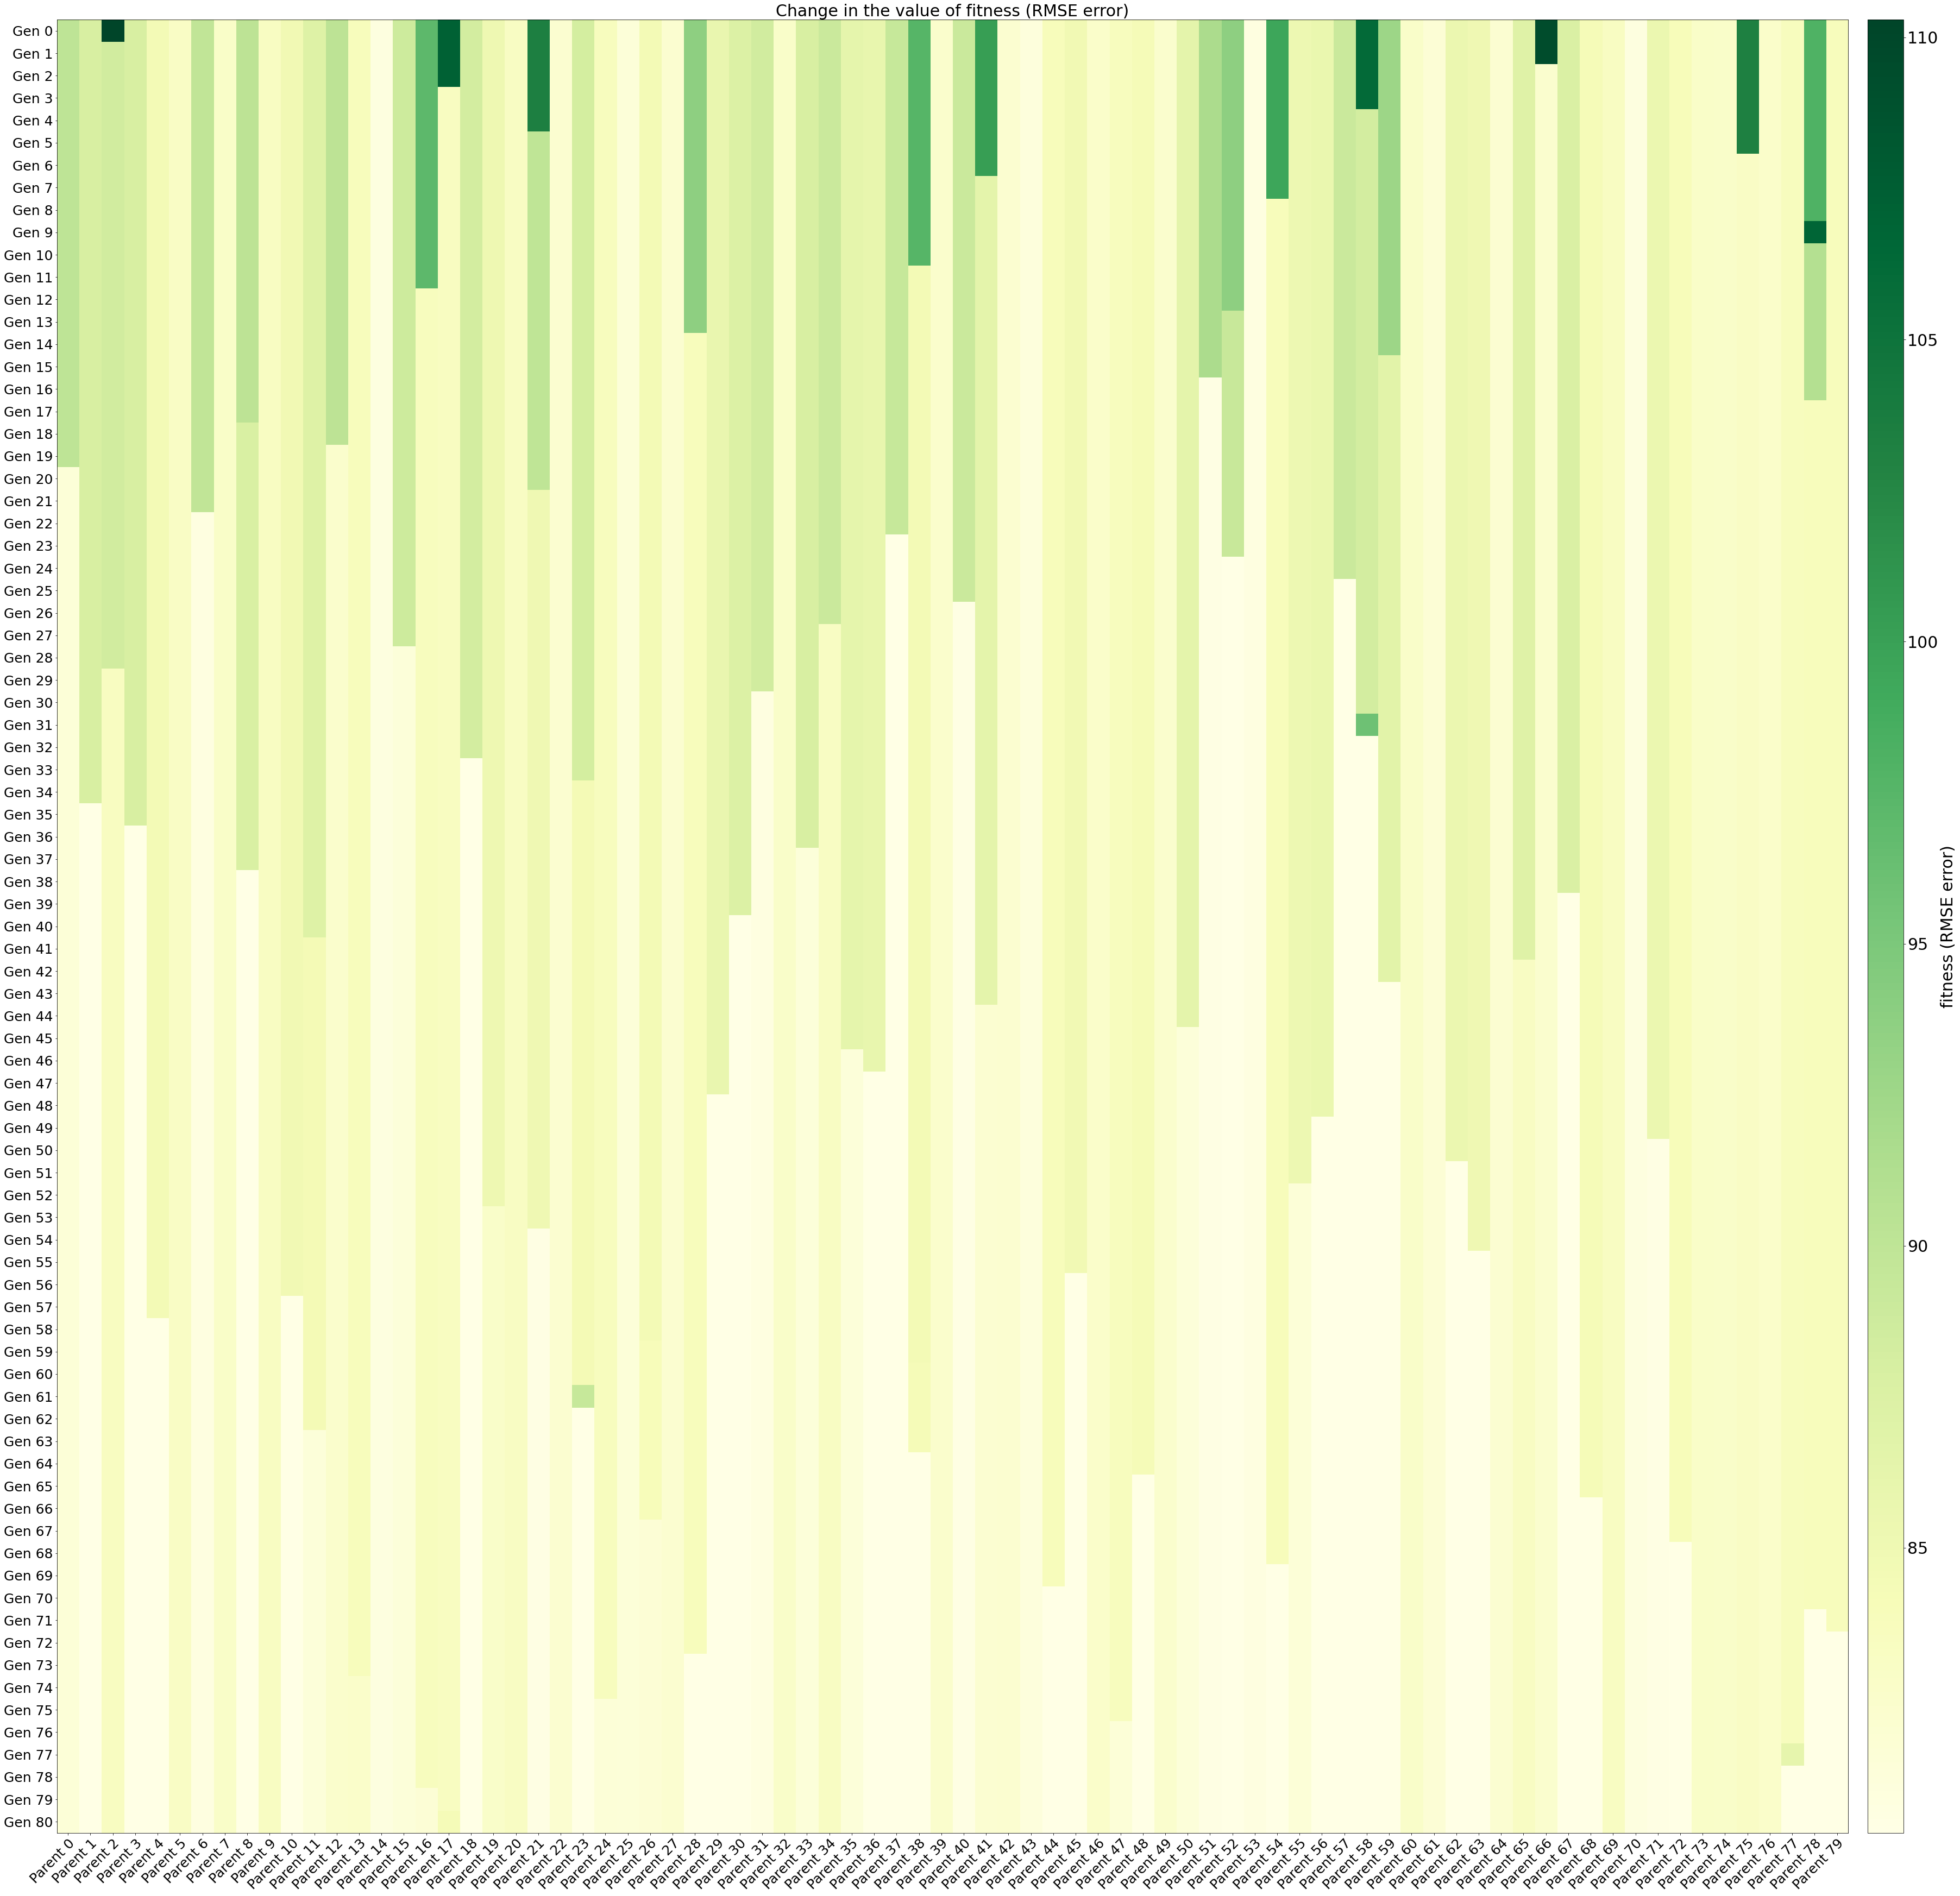

In [13]:
plot_parameters(numberOfGenerations, numberOfParents, fitnessHistory, "fitness (RMSE error)")

In [15]:
#Look at individual parameters change with generation
#Create array for each parameter history (Genration x Parents)

filter_size1 = populationHistory[:, 0].reshape([numberOfGenerations+1, numberOfParents])
layer2 = populationHistory[:, 1].reshape([numberOfGenerations+1, numberOfParents])
filter_size2 = populationHistory[:, 2].reshape([numberOfGenerations+1, numberOfParents])
layer3 = populationHistory[:, 3].reshape([numberOfGenerations+1, numberOfParents])
filter_size3 = populationHistory[:, 4].reshape([numberOfGenerations+1, numberOfParents])
OptionalDense = populationHistory[:, 5].reshape([numberOfGenerations+1, numberOfParents])
Dense_size = populationHistory[:, 6].reshape([numberOfGenerations+1, numberOfParents])
epochs = populationHistory[:, 7].reshape([numberOfGenerations+1, numberOfParents])
batchsize = populationHistory[:, 8].reshape([numberOfGenerations+1, numberOfParents])


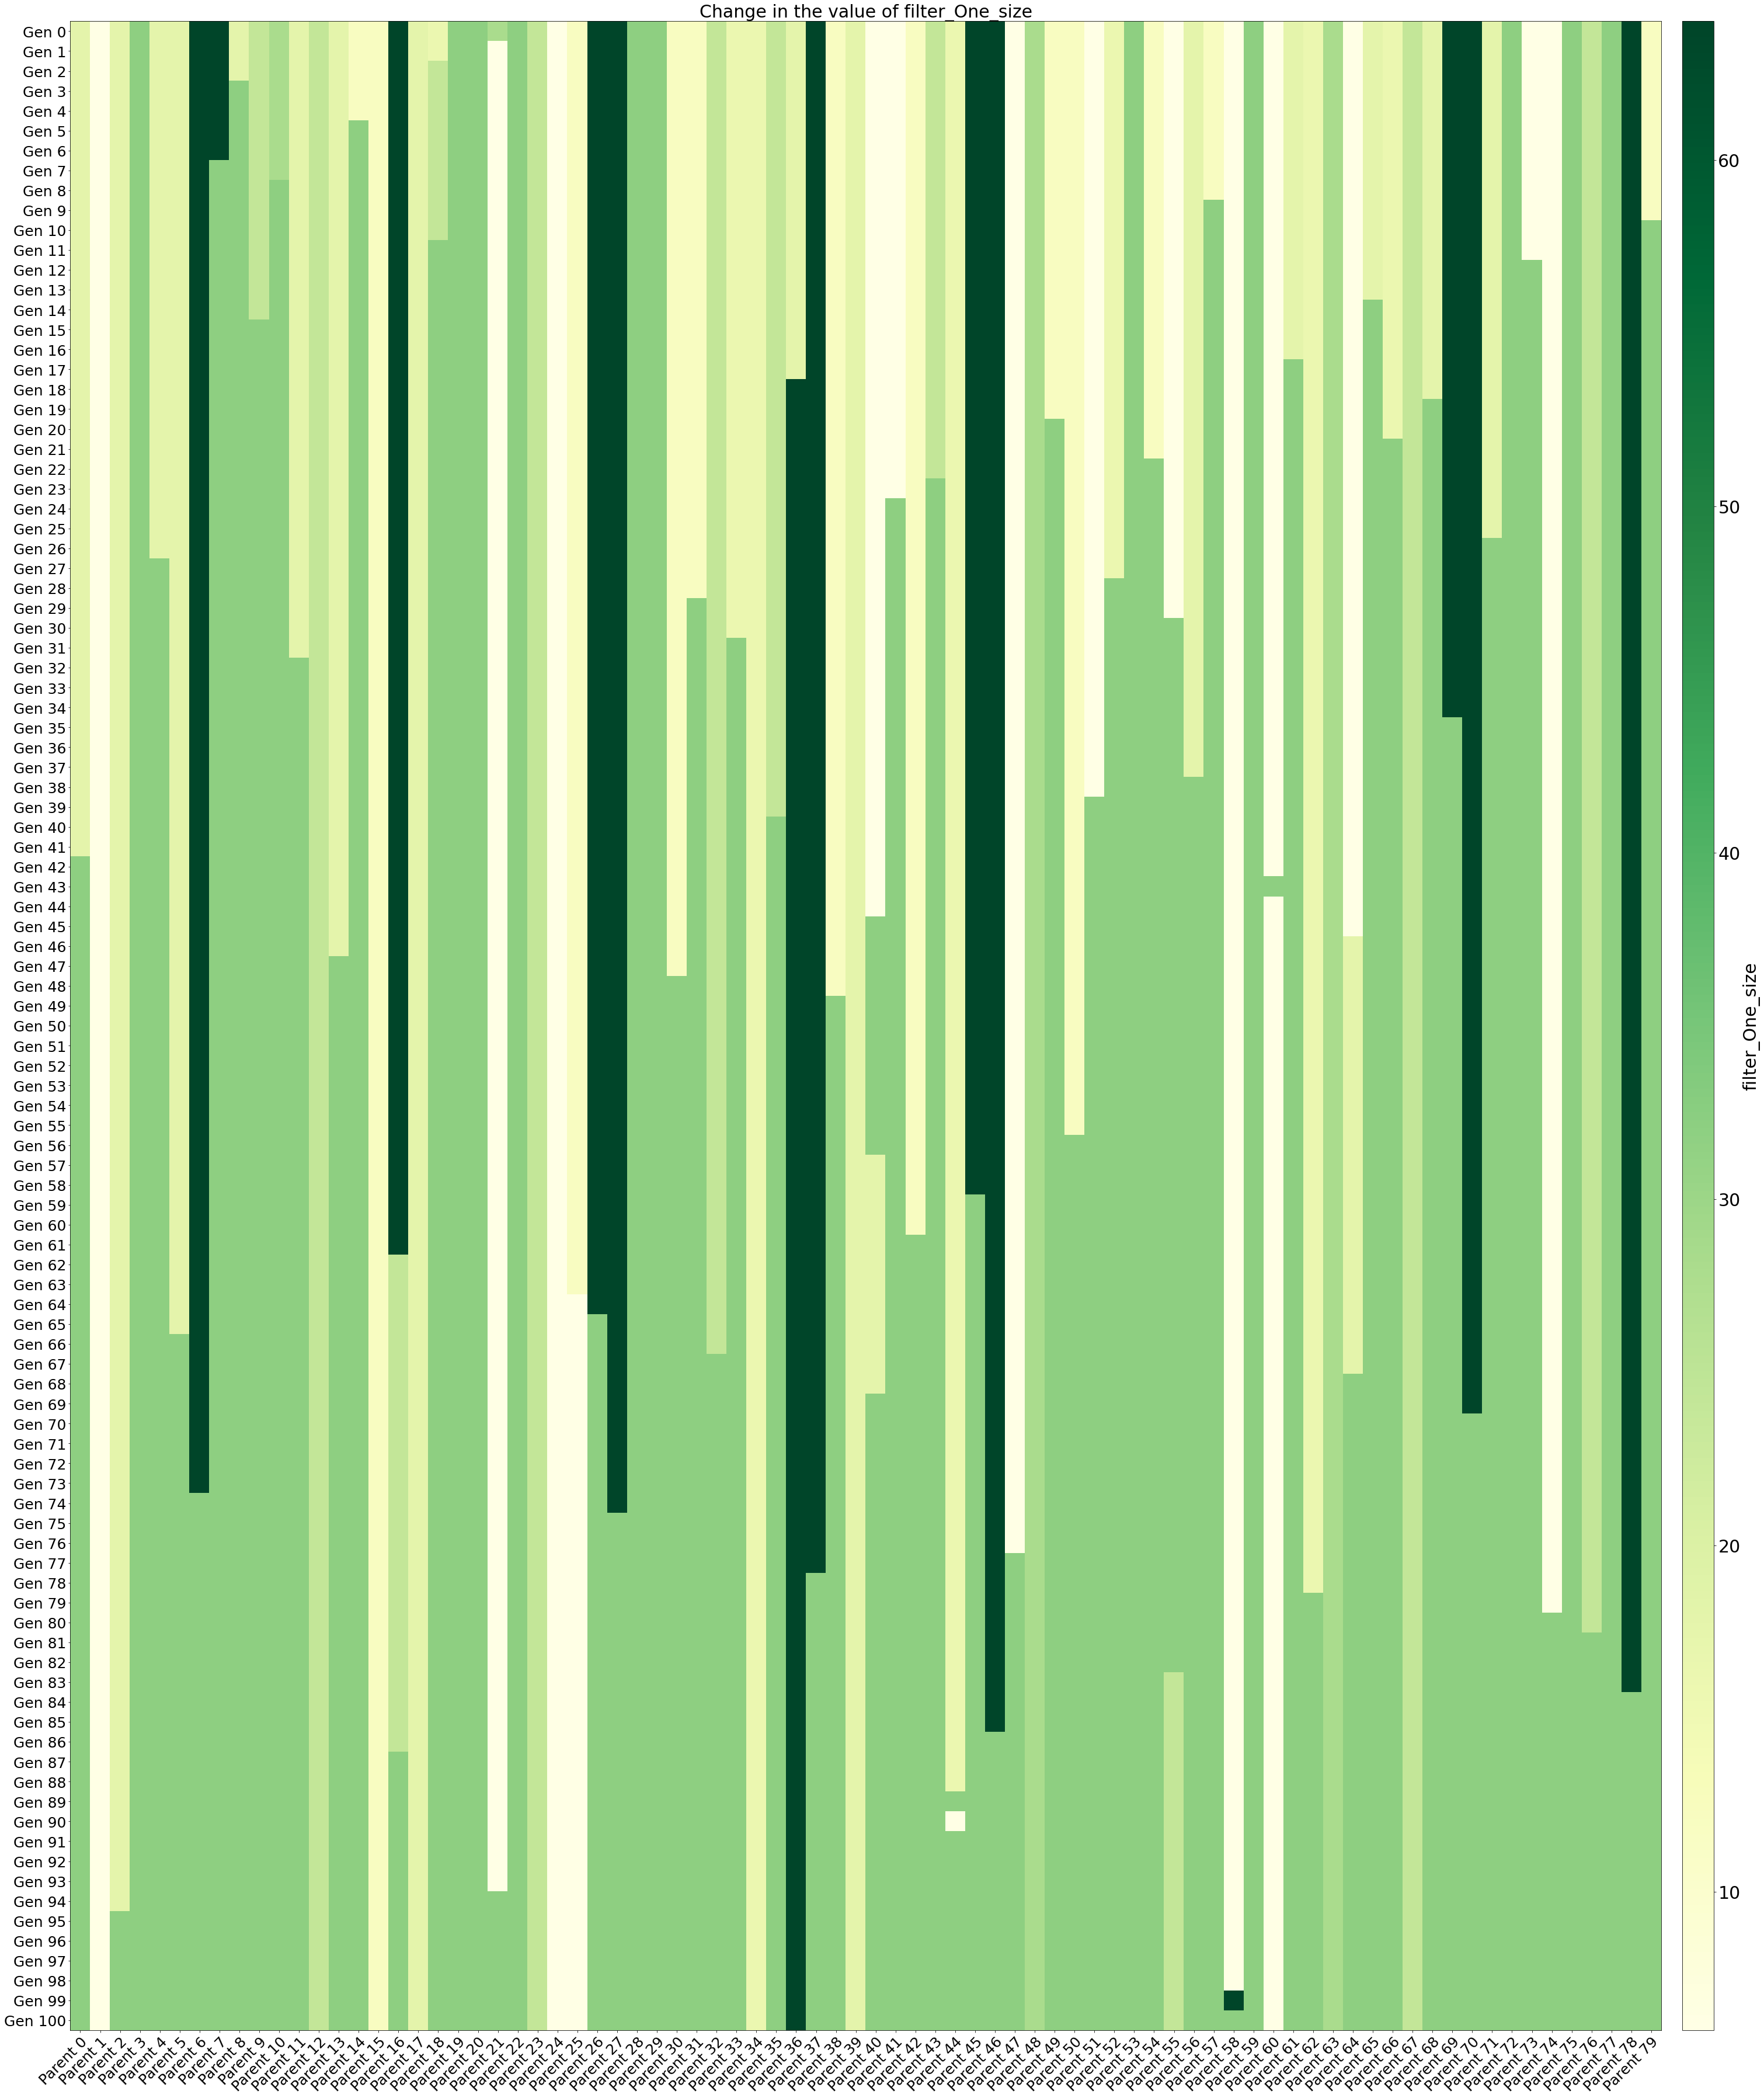

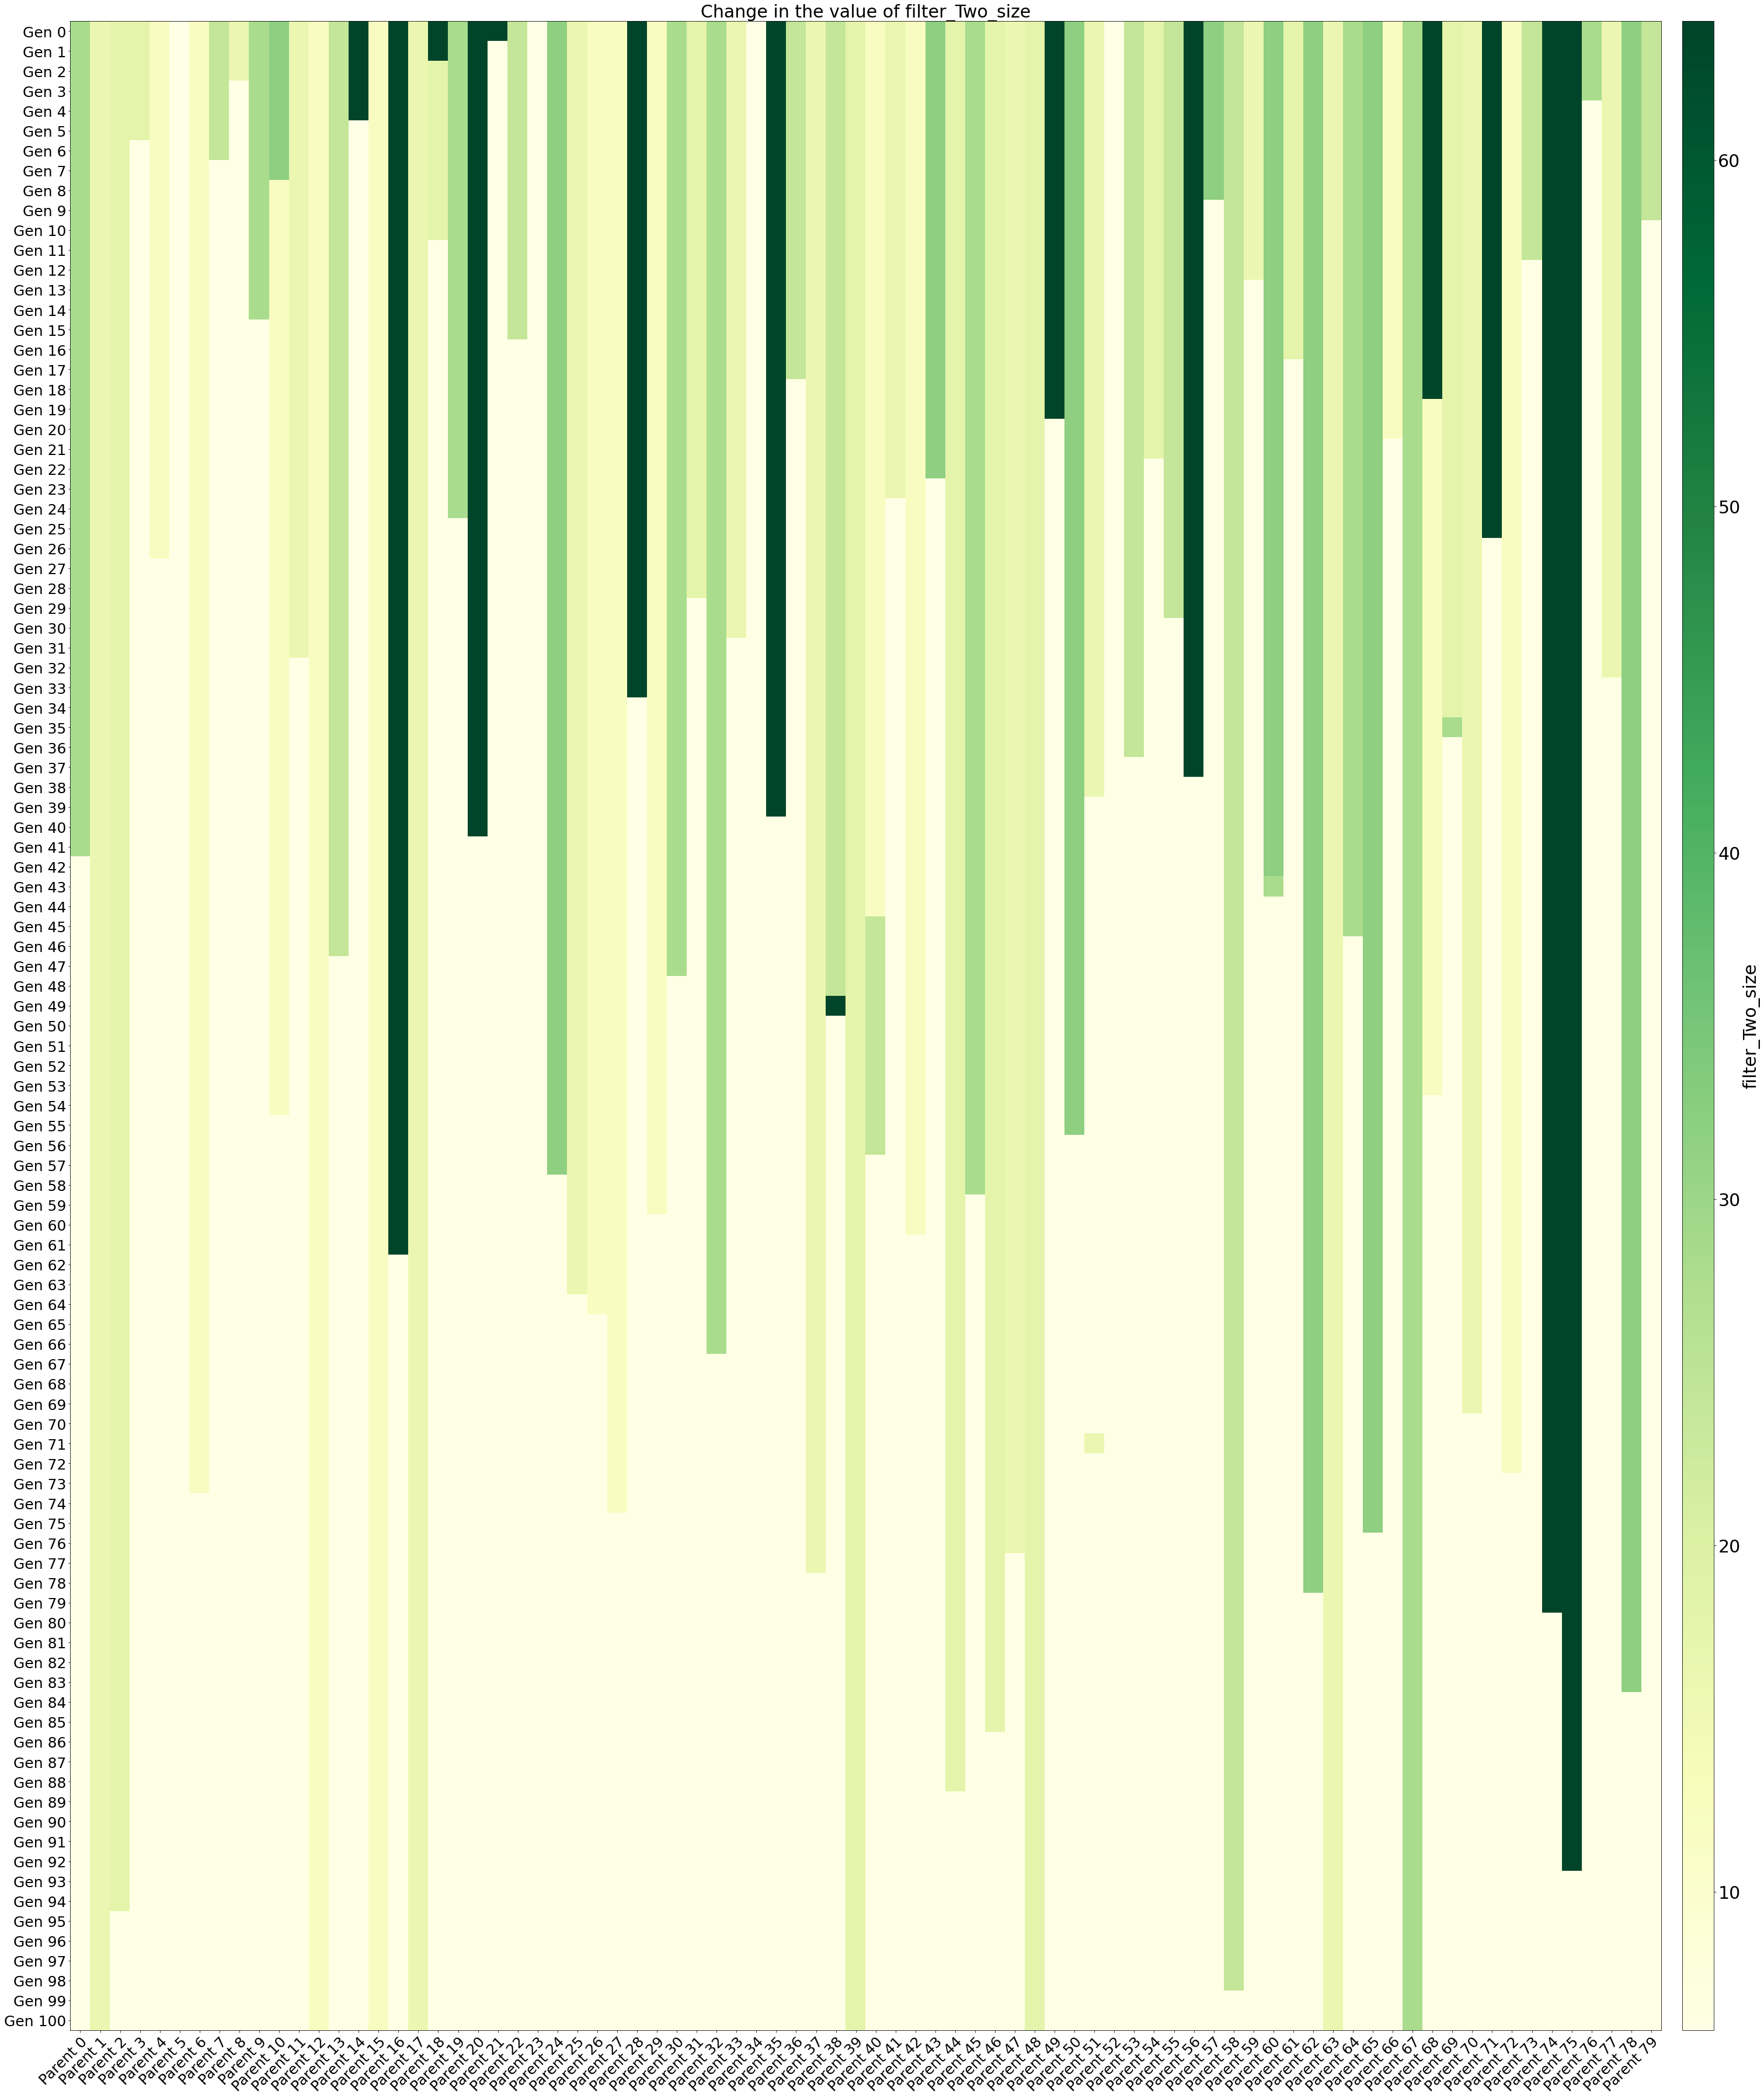

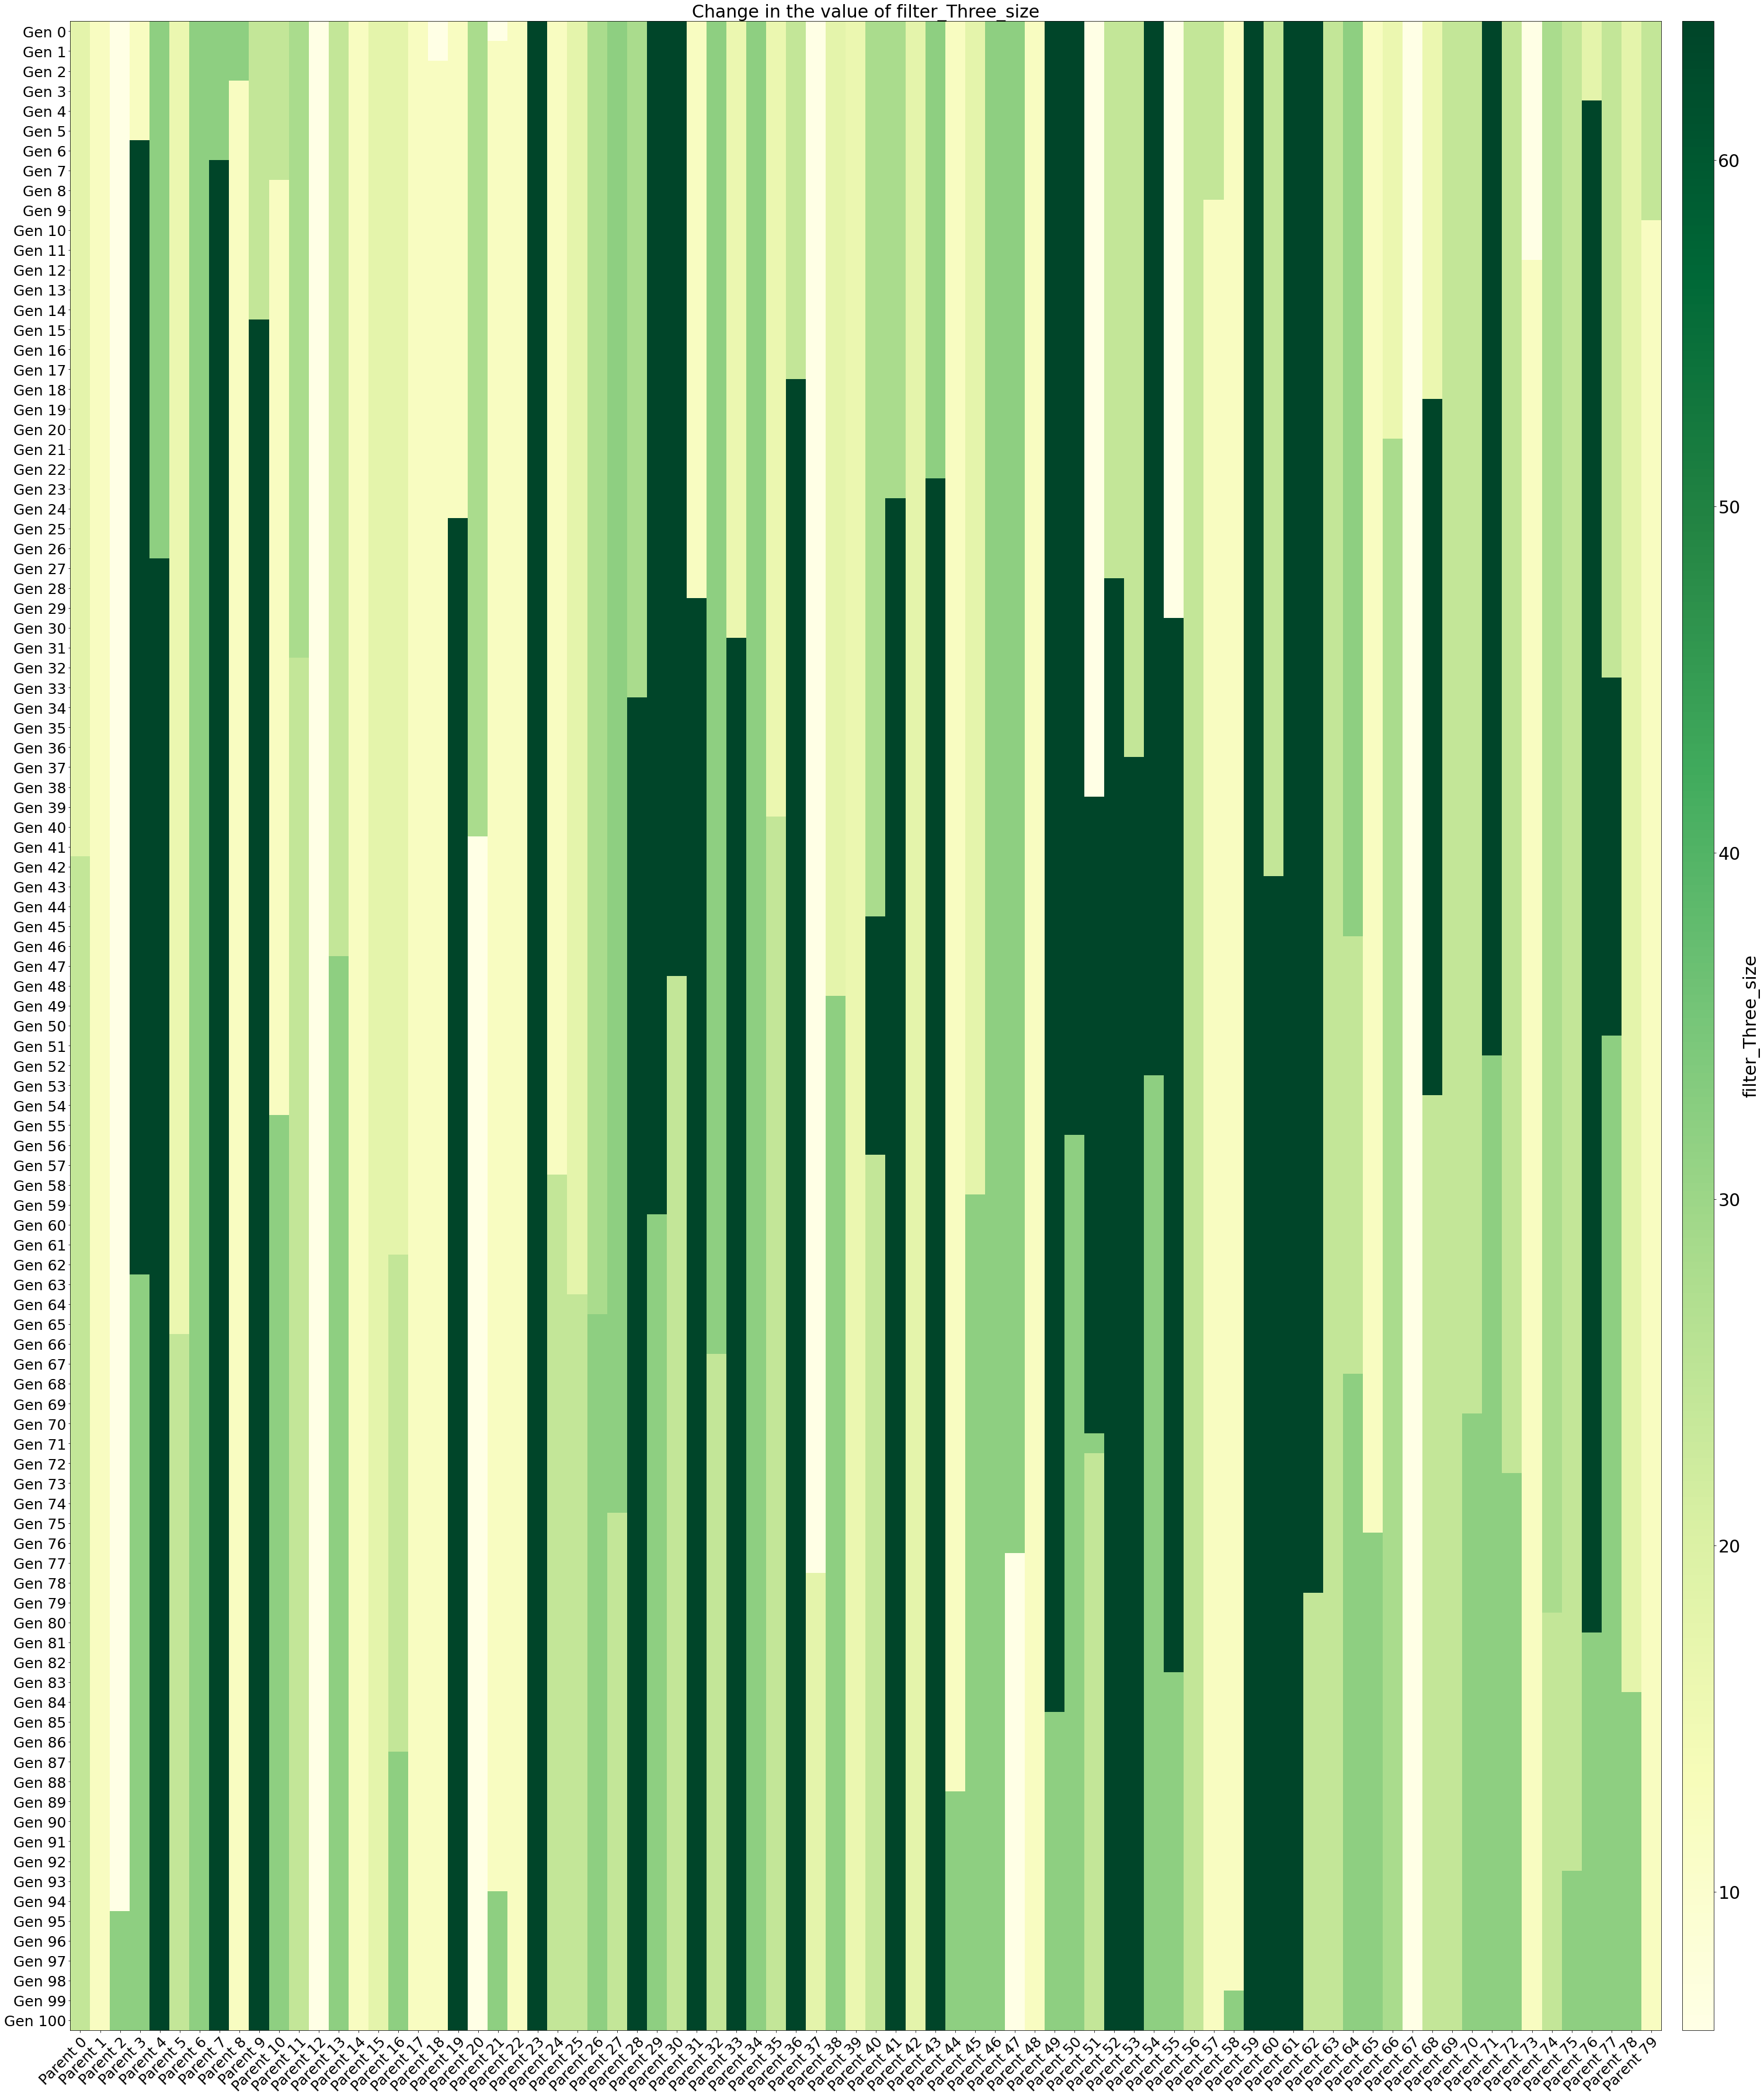

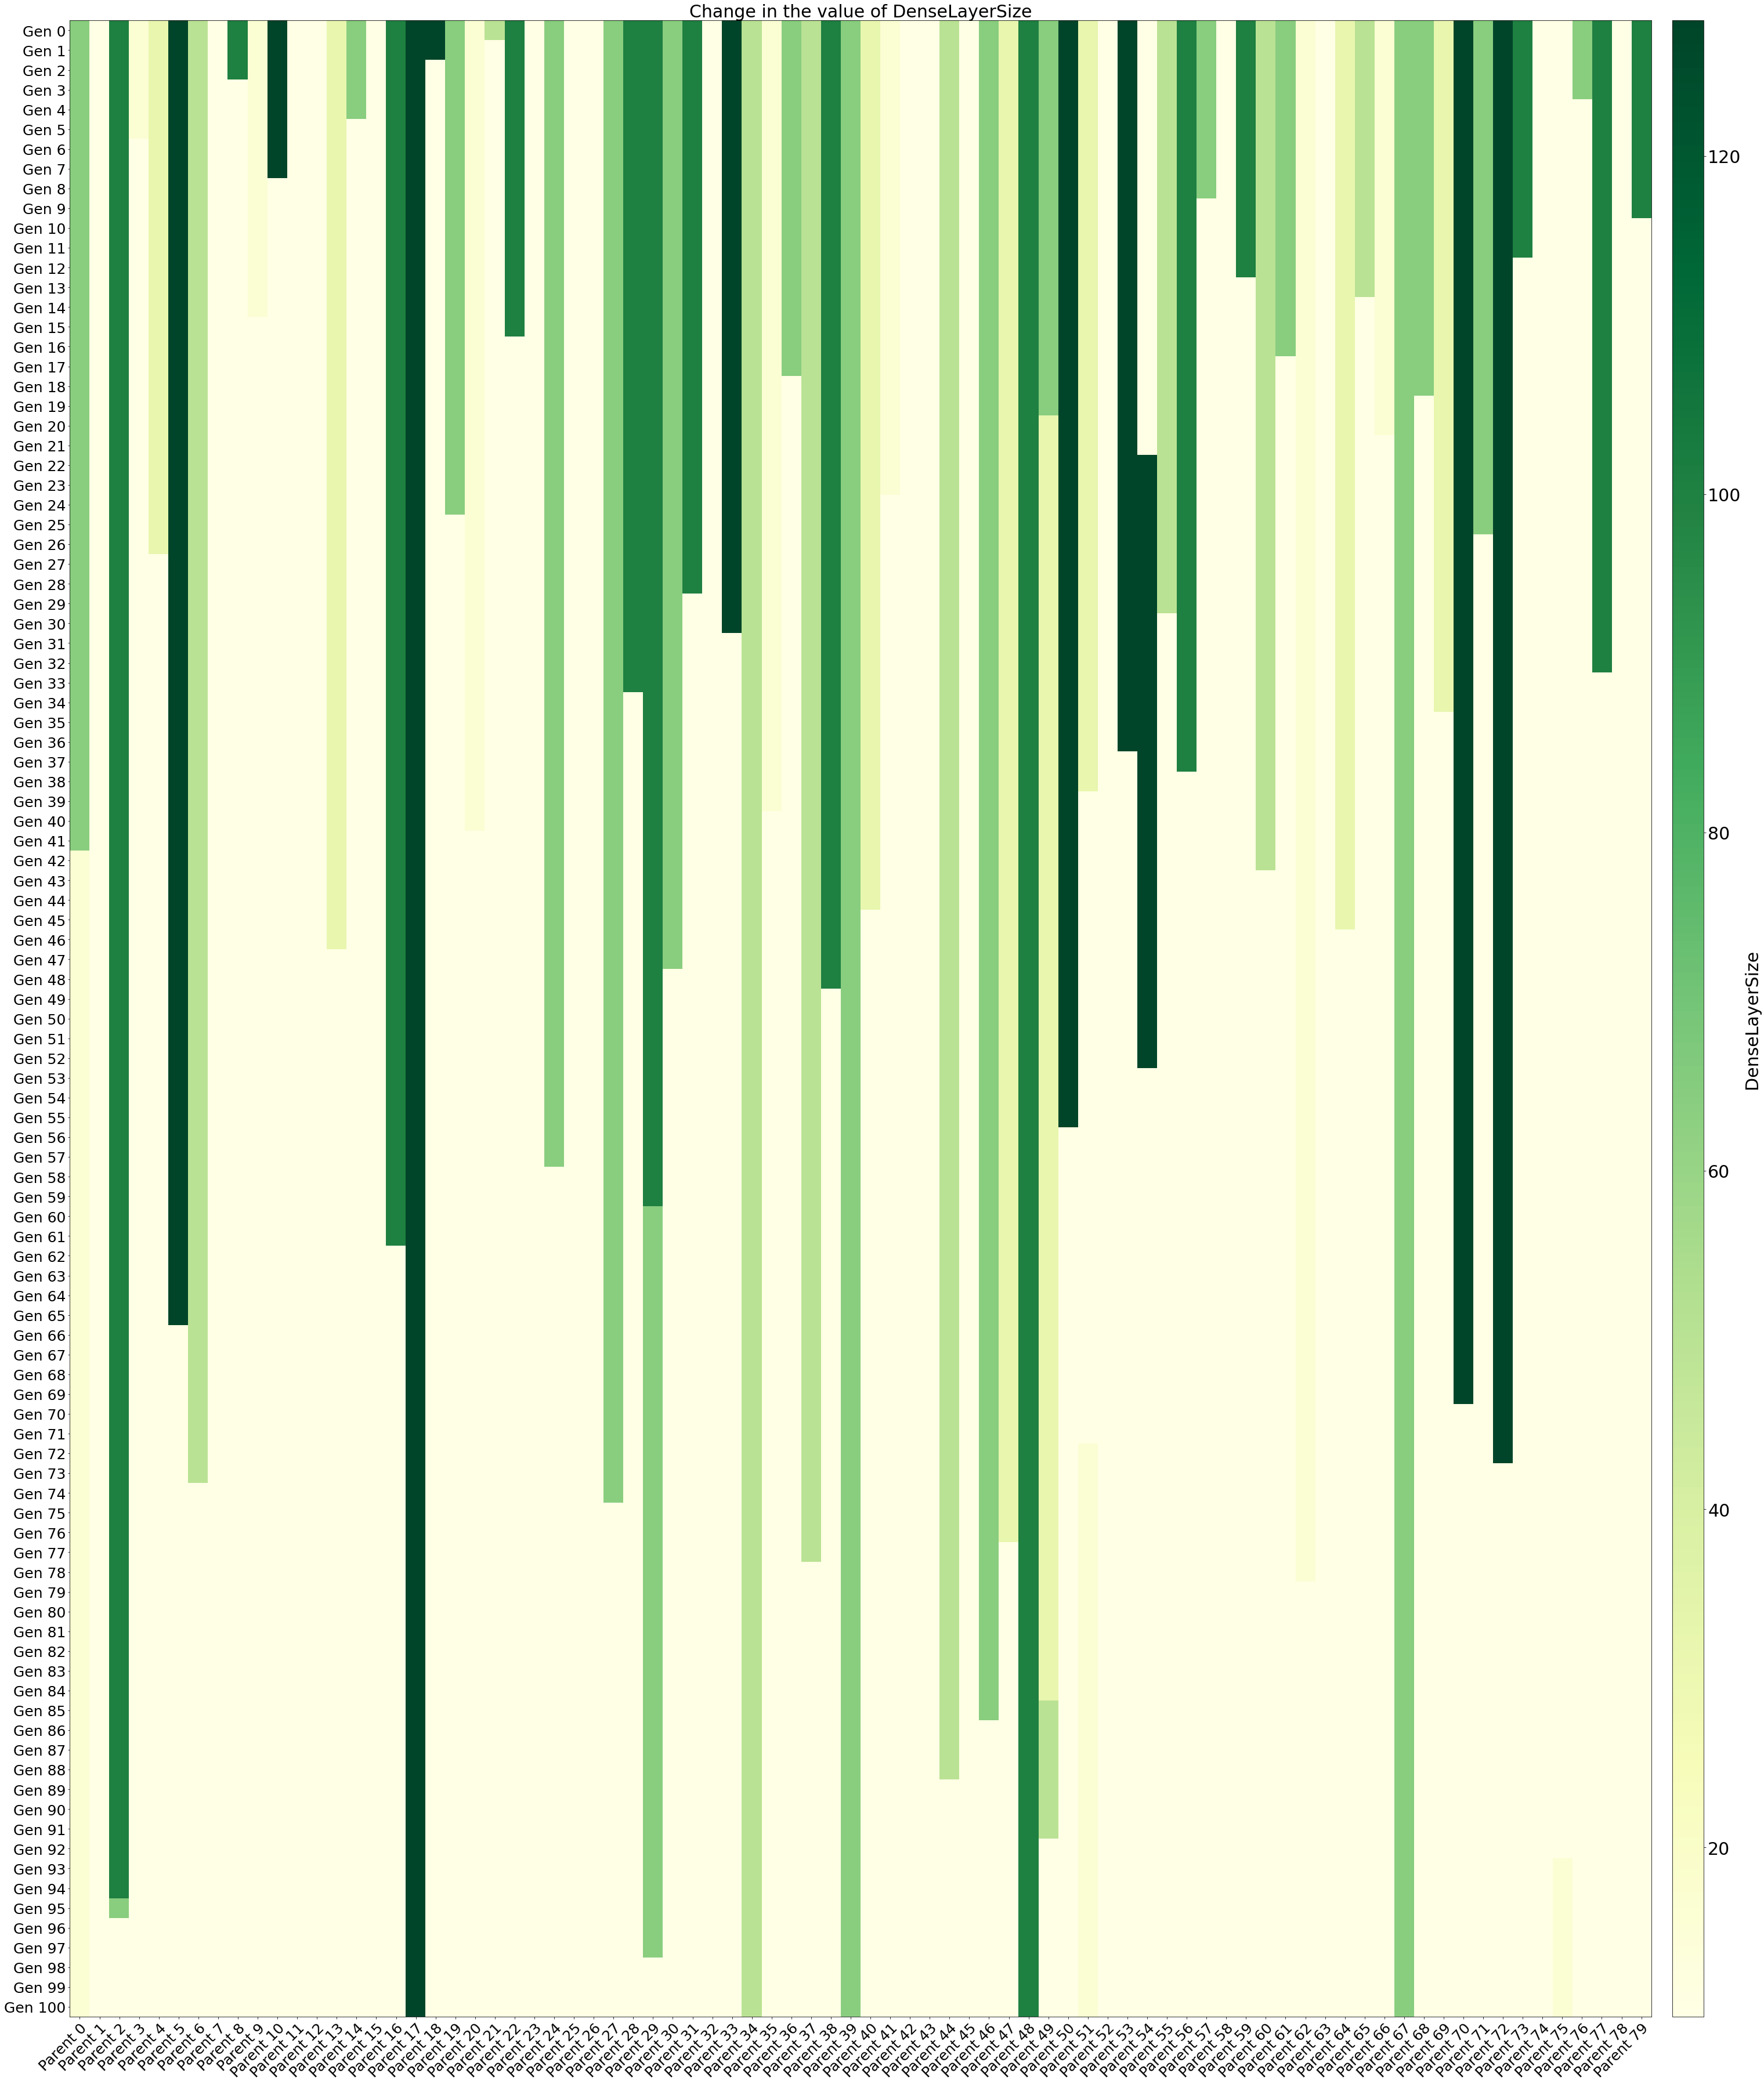

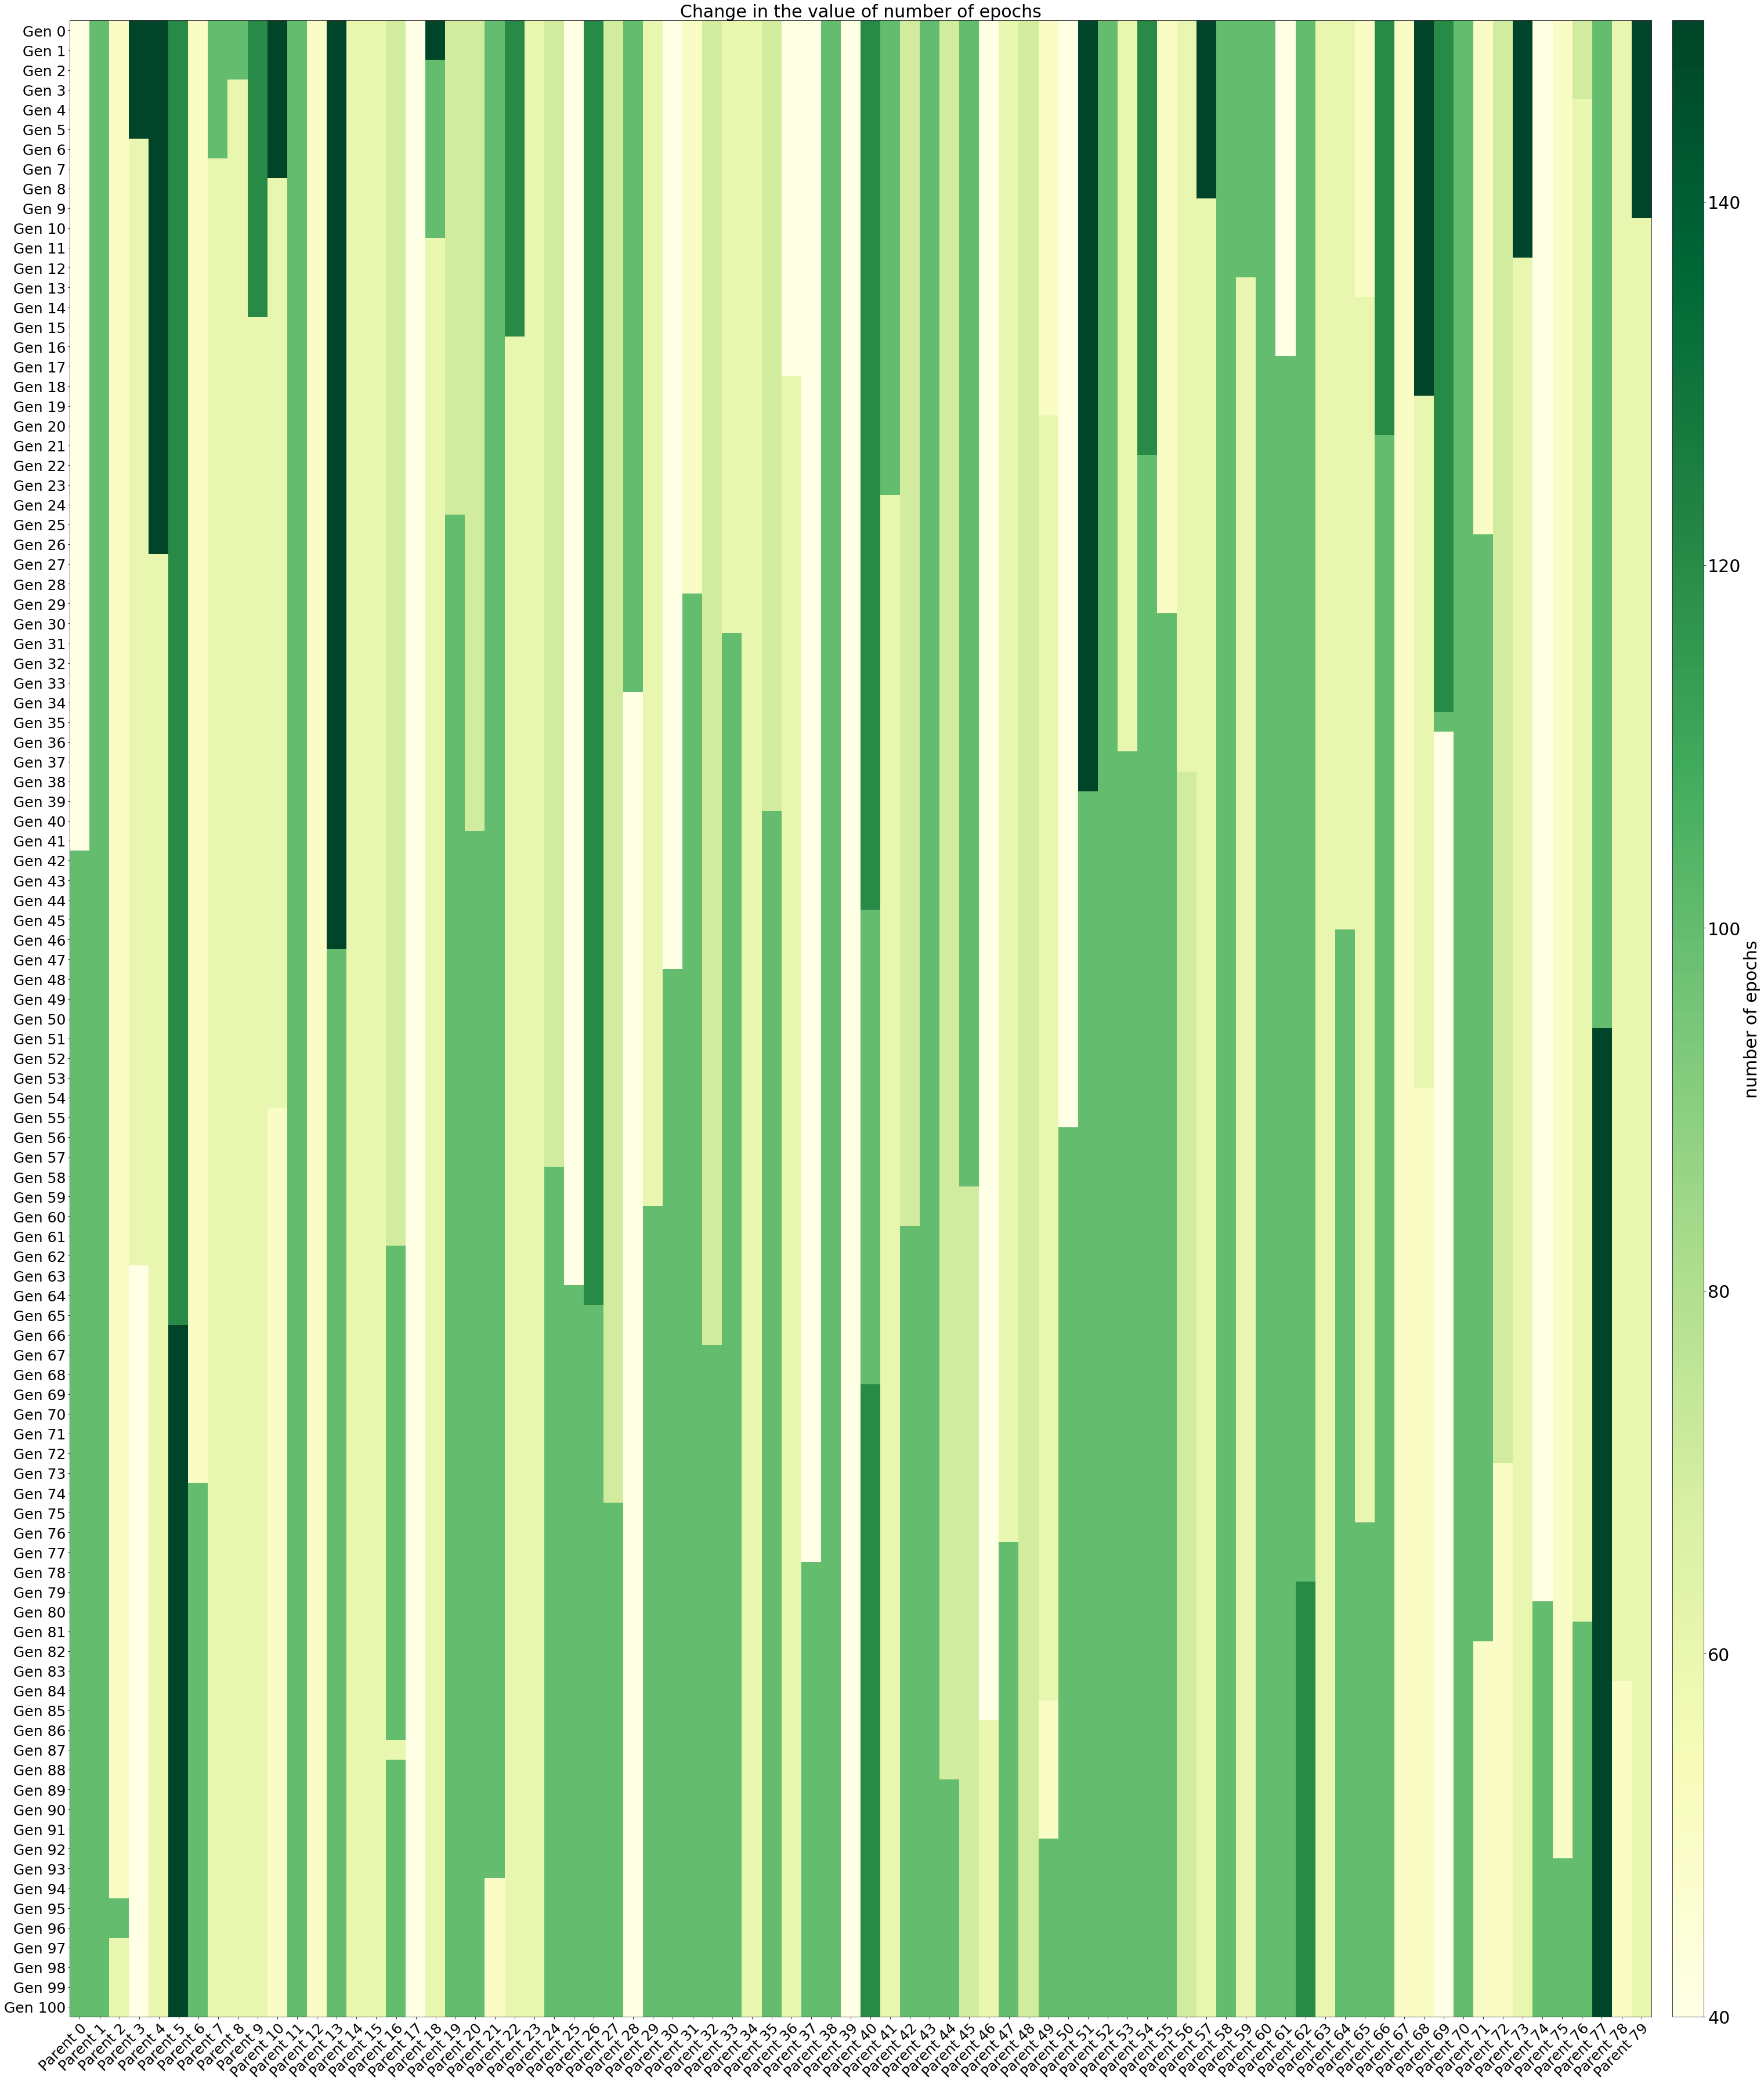

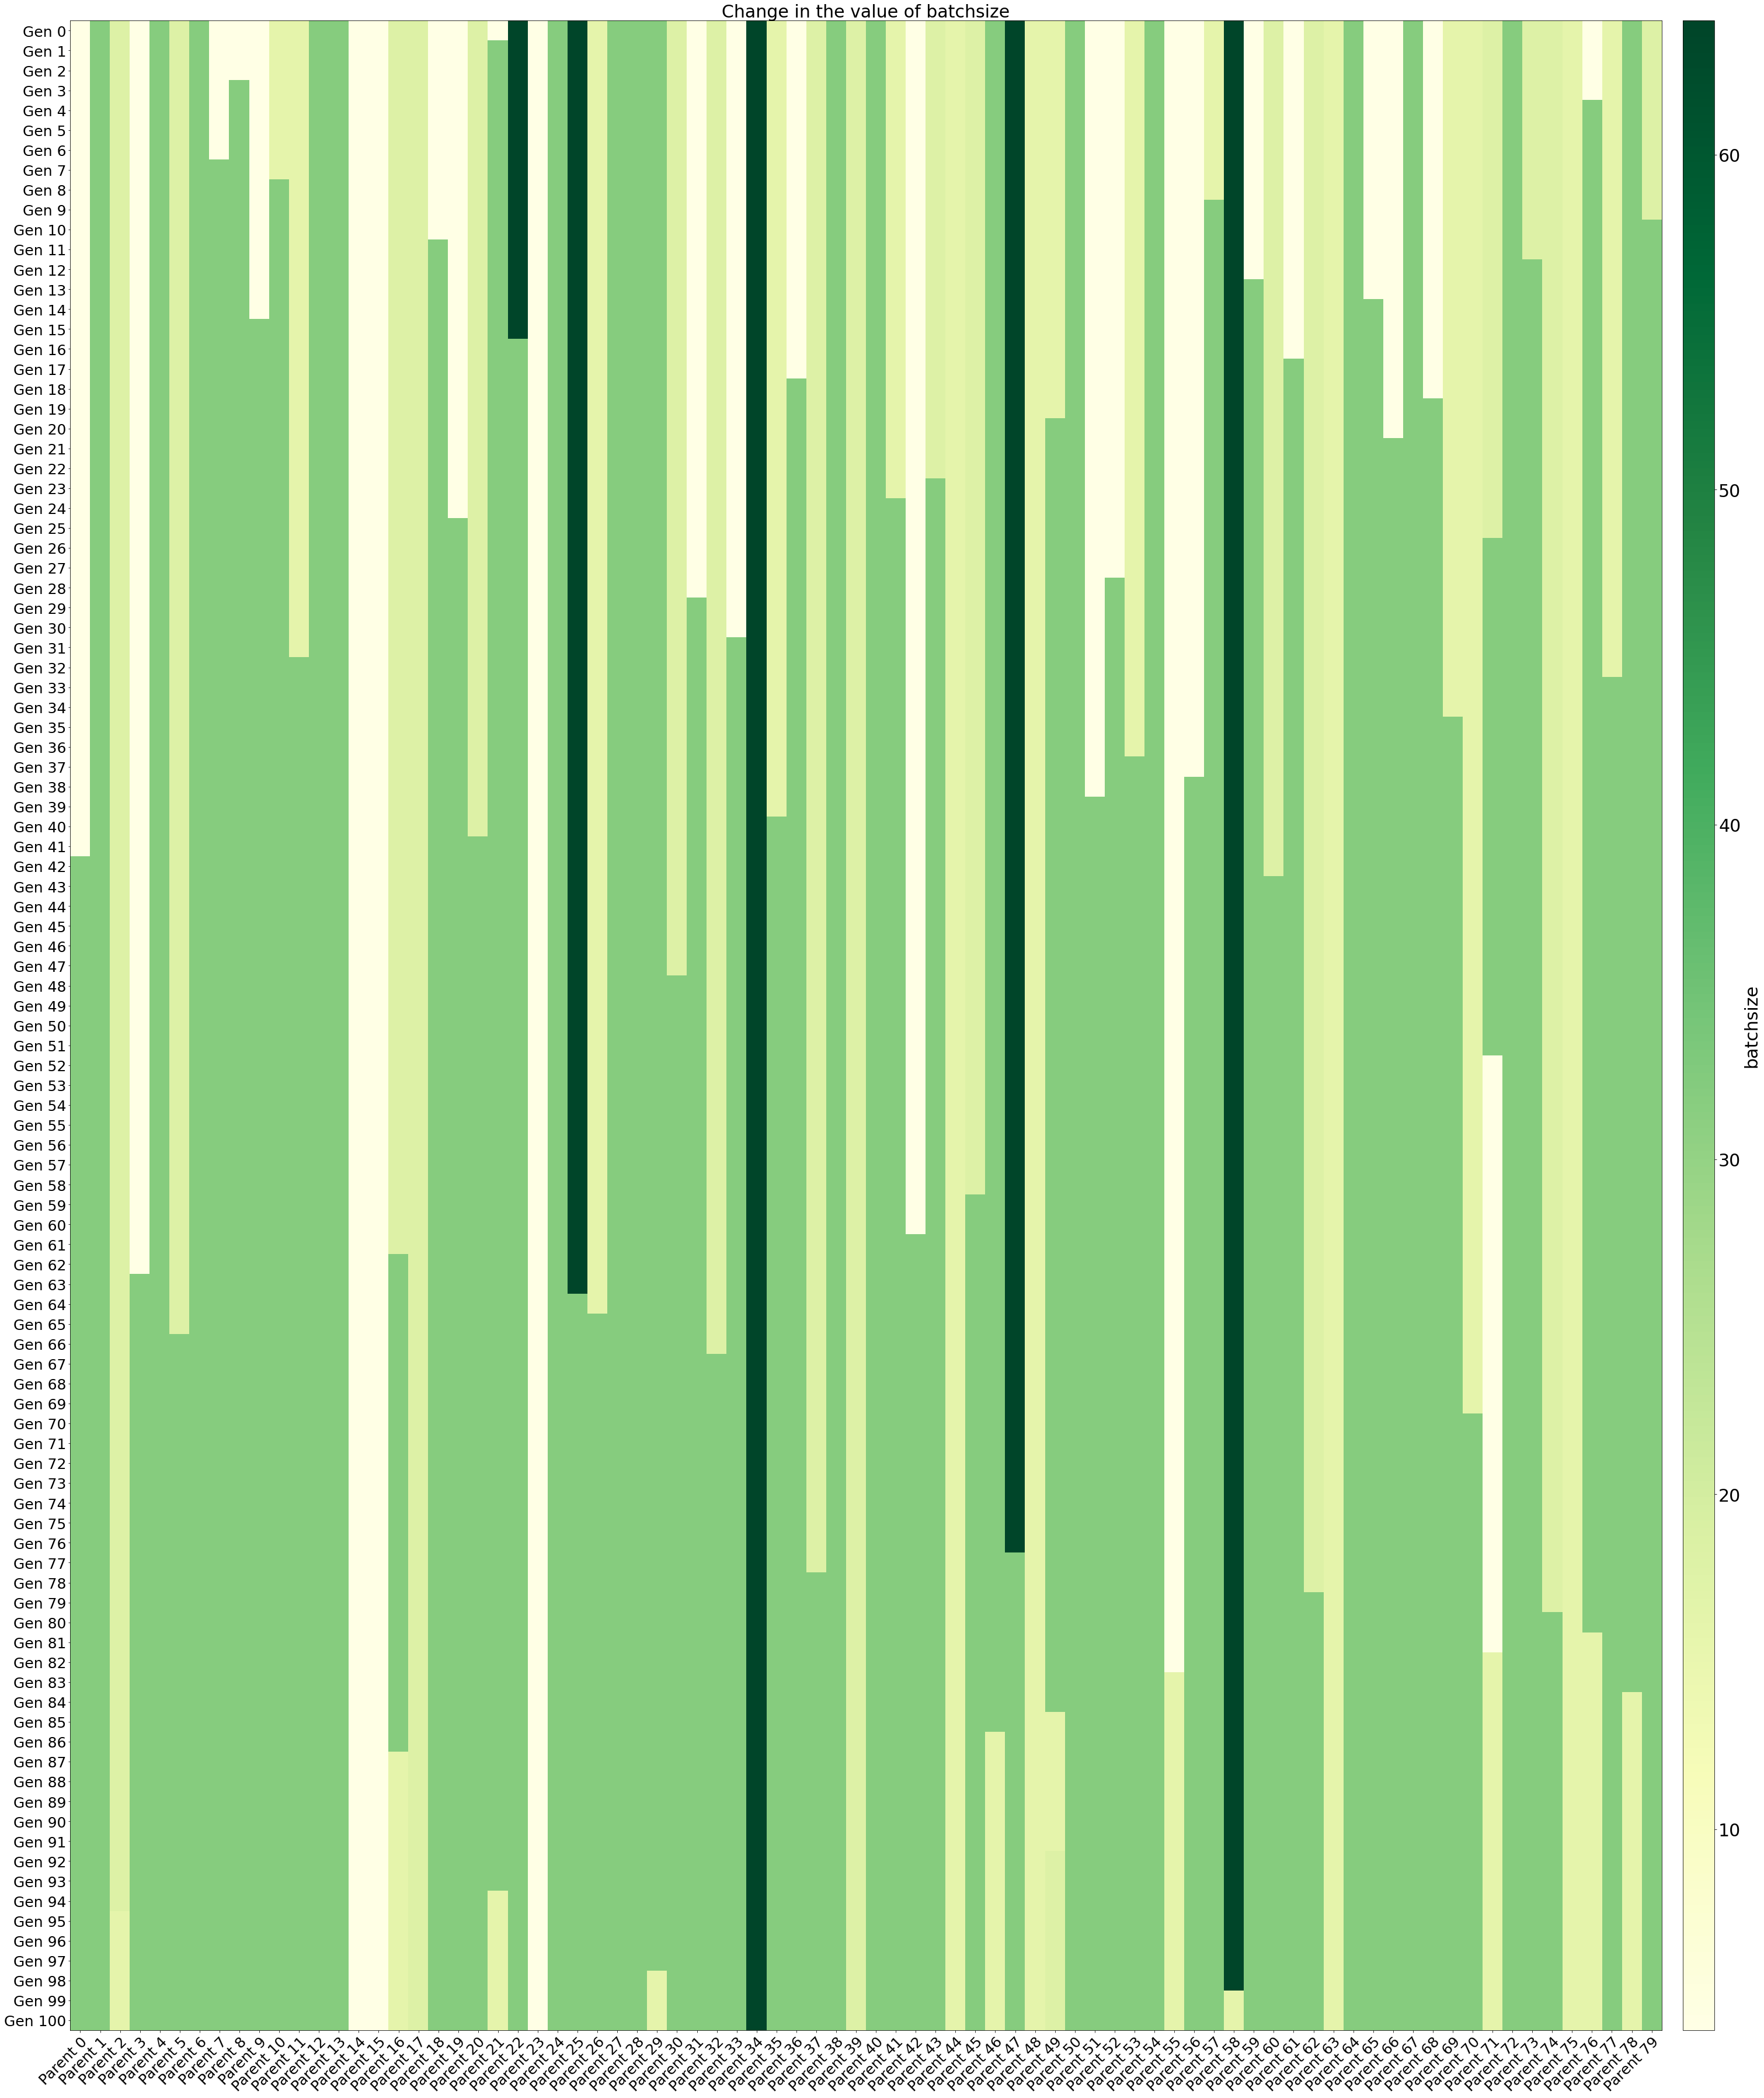

In [16]:
#generate heatmap for each parameter
plot_parameters(numberOfGenerations, numberOfParents, filter_size1, "filter_One_size")
plot_parameters(numberOfGenerations, numberOfParents, filter_size2, "filter_Two_size")
plot_parameters(numberOfGenerations, numberOfParents, filter_size3, "filter_Three_size")
plot_parameters(numberOfGenerations, numberOfParents, Dense_size, "DenseLayerSize")
plot_parameters(numberOfGenerations, numberOfParents, epochs, "number of epochs")
plot_parameters(numberOfGenerations, numberOfParents, batchsize, "batchsize")